**Online shoppers' purchasing intentions**

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided on the UC Irvine’s Machine Learning Repository. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website.




# Summary
📌 There is class imbalance in this dataset.  The positive classes have much fewer samples than the other classes. This can present problems for machine learning algorithms, as they may be biased toward the majority class and perform poorly on the minority class.



📌 Following the EDA session, we examine the univariate and multivariate variables.







📌 Because our dataset contains both categorical and numerical columns, we will transform them using one hot encoding technique.



📌 Following that, we eliminate the feature with a high multicollinearity.



📌 Then we use PCA technique to reduce the dimensionality and we do the feature selection. Finding the correlation between a feature and predictors and PCA are the two methods we test.



📌 Model using PCA scored lower than Model using Selected Features.
(PCA Technique : Random Forest Tuned with ROC-AUC 0.918008 Score, Precision 0.883366 Score and Recall Score 891646)
(Feature Selection : Random Forest Tuned with ROC-AUC 0.932590 Score,  Precision 0.899430 Score and Recall Score 0.904380)
This demonstrates that the method we used to eliminate unused features—finding data correlation—is appropriate for this dataset.




📌 When compared to using all features, the irrelevant features produce the poorest performance model.
(Refer to The PCA visualization this proves the data captured in the first three PCs is informative enough to discriminate the categories from each other.
In other words, we now have proof that the data is not just random but may be utilized to distinguish or explain the target variable)



📌 To manage imbalance class. Re-Weight, random over- and under sampling, and the SMOTE technique are used.
After addressing class imbalance, we discovered that the Random Forest Tuned model is the most effective one, as evidenced by its ROC score, precision, and recall values, which are all close to 1.



📌 After we try different models and evaluate their performance. We found the most effective models which are Random Forest Tuned.




💾 คำอธิบายรายละเอียดของข้อมูล

1. Administrative - จำนวนหน้าเพจหลักที่ผู้ใช้งานเข้าชม


2. Administrative Duration - ระยะเวลาที่ใช้ในการเข้าชมหน้าเพจหลัก


3. Informational - จำนวนหน้าเพจรายละเอียดสินค้าที่ผู้ใช้งานเข้าชมต่อจากหน้าเพจหลัก


4. Informational Duration - ระยะเวลาที่ใช้ในการชมหน้าเพจรายละเอียดสินค้า


5. Product Related - จำนวนเพจที่เข้าชมโดยขึ้นกับประเภทของสินค้าที่ผู้ใช้งานสนใจ


6. Product Related Duration - ระยะเวลาที่ใช้ในเพจที่มีประเภทสินค้าที่ผู้ใช้งานสนใจ


7. Bounce Rate - อัตราส่วนการออกจากเวปไซต์ หลังจากผู้ใช้งานเข้ามาหน้าเพจเดียว และกดออกจากเวปไซต์ (เข้ามาดูหน้าเดียวและออกจากเวปไซต์เลย)


8. Exit Rate - เปอร์เซ็นต์ที่หน้าเพจนั้นเป็นหน้าสุดท้ายก่อนที่ผู้ใช้งานจะกดปิด และออกจากเวปไซต์ (โดยคำนวนจาก จำนวนที่หน้าเพจนั้นเป็นหน้าสุดท้ายเทียบกับจำนวนPage View ทั้งหมดของหน้าเพจนั้น)


9. Page Value - ค่าเฉลี่ยของเวปเพจที่ผู้ใช้งานเข้าชมก่อนตัดสินใจสินใจซื้อสินค้า


10. SpecialDay - ค่าเฉลี่ยการซื้อสินค้าในช่วงเทศกาล


11. Month - เดือนที่ผู้ใช้งานเข้าชมเวปเพจ


12. OpearatingSystems - ระบบปฏิบัติการที่ผู้ใช้งานใช้เข้าชมเวปไซต์


13. Browser - บราวเซอร์ที่ผู้ใช้งานใช้เข้าชมเวปไซต์


14. Region - ที่อยู่ของผู้ใช้งาน


15. TrafficType - ประเภทของช่องทางที่เข้าถึงเวปไซต์


16. VisitorType - ประเภทของของผู้ใช้งาน
- Returning_Visitor : ผู้ใช้งานที่เคยเข้ามาเยี่ยมชมเวปไซต์แล้ว
- New_Visitor : ผู้ใช้งานใหม่
- Other : ผู้ใช้งานประเภทอื่นๆ (ระบบไม่สามารถระบุที่มาได้)


17. Weekend - ผู้ใช้งานตัดสินใจซื้อสินค้าในวันเสาร์-อาทิตย์ หรือ วันจันทร์-ศุกร์
- True : ซื้อสินค้าในวันเสาร์-อาทิตย์
- False : ซื้อสินค้าในวันจันทร์-ศุกร์


18. Revenue ผู้ใช้งานตัดสินใจซื้อหรือไม่ซื้อสินค้า
- True : ซื้อสินค้า
- False : ไม่ซื้อสินค้า

#Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from scipy.stats import shapiro,mannwhitneyu,chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
from sklearn.tree import export_graphviz
import imblearn
import hyperopt

import warnings
warnings.filterwarnings('ignore')

#Reading the data set

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')

In [ ]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

#Shape of Data

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#Checking null values

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#Descriptive Statistics:

In [ ]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [ ]:
df.describe(include=['object','bool'])

Month        VisitorType Weekend Revenue
count   12330              12330   12330   12330
unique     10                  3       2       2
top       May  Returning_Visitor   False   False
freq     3364              10551    9462   10422

Skewness:

In [ ]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

Kurtosis:

In [ ]:
df.kurtosis()

Administrative               4.701146
Administrative_Duration     50.556739
Informational               26.932266
Informational_Duration      76.316853
ProductRelated              31.211707
ProductRelated_Duration    137.174164
BounceRates                  7.723159
ExitRates                    4.017035
PageValues                  65.635694
SpecialDay                   9.913659
OperatingSystems            10.456843
Browser                     12.746733
Region                      -0.148680
TrafficType                  3.479711
Weekend                     -0.397404
Revenue                      1.646493
dtype: float64

#EDA

In [ ]:
num_col=['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

Visualize columns using Boxplot

<Axes: >

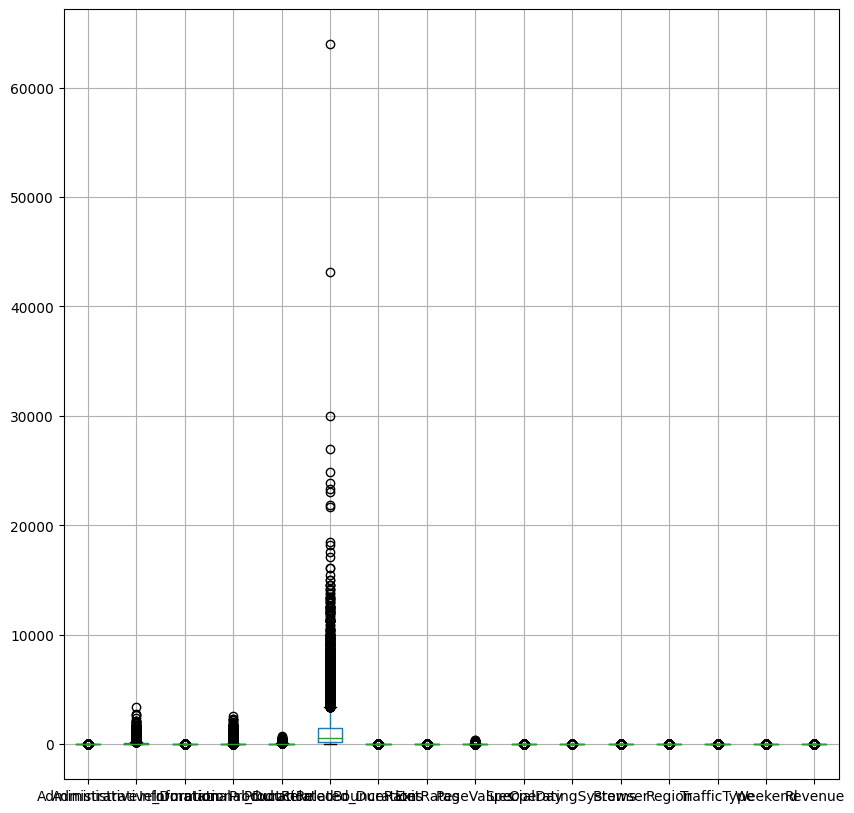

In [ ]:
plt.figure(figsize=(10,10))
df.boxplot()

Distribution of all numerical columns:

array([[<Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>],
       [<Axes: title={'center': 'ExitRates'}>,
        <Axes: title={'center': 'PageValues'}>]], dtype=object)

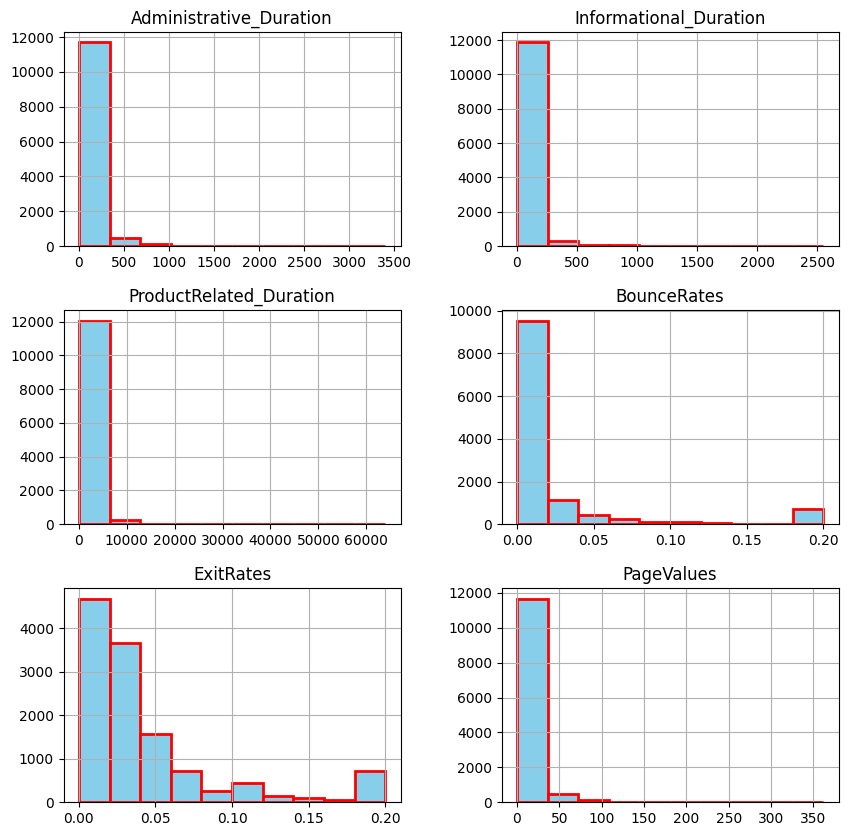

In [ ]:
df.hist(column=num_col,figsize=(10,10), color = 'skyblue', ec='red', lw=2)

Checking Class Imbalance

Text(0, 0.5, '')

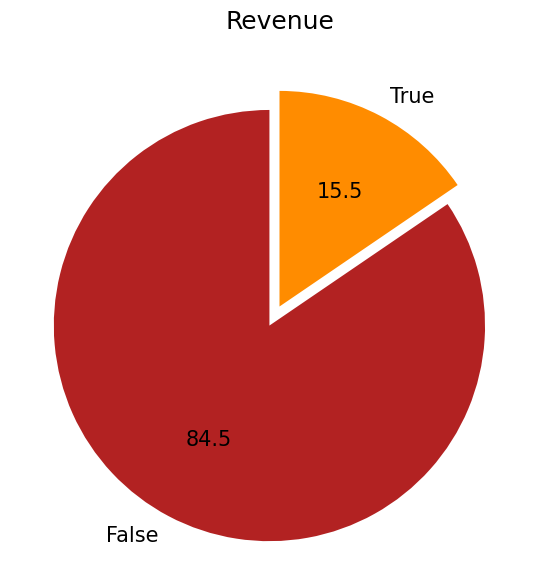

In [ ]:
plt.figure(figsize=(7,7))
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['Firebrick','DarkOrange'])
plt.title('Revenue', fontsize = 18)
plt.ylabel('')

According to the Pie Chart, Class Imbalance is the percentage of customers who decide to buy a product, which is just 15.5%, while the percentage of customers who viewed the product but did not purchase it is 84.5%. As a result, new sample data must be managed in order to develop an efficient model.

#Univariate Analysis

<Axes: title={'center': 'Number of Customers adding Revenue'}, xlabel='Revenue', ylabel='count'>

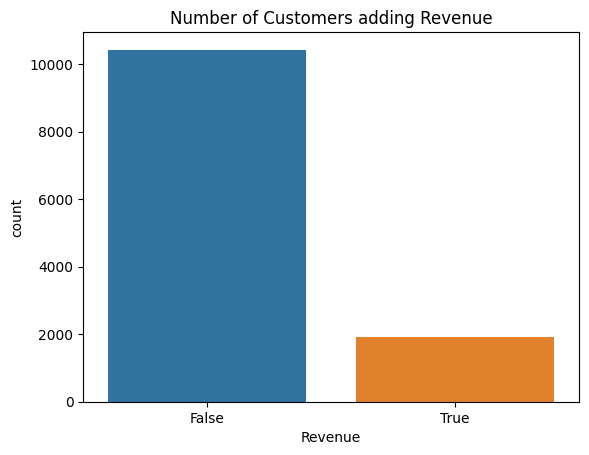

In [ ]:
plt.title('Number of Customers adding Revenue')
sns.countplot(x=df['Revenue'])

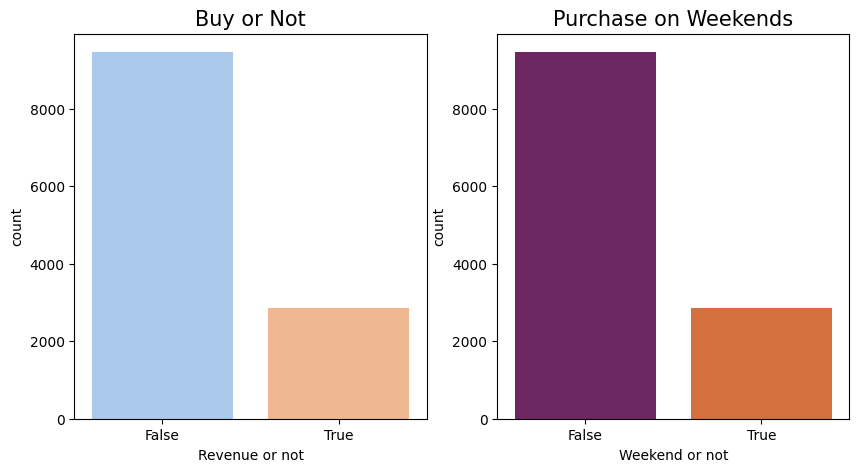

In [ ]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 5)

plt.subplot(1, 2, 1)
sns.countplot(x=df['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 10)
plt.ylabel('count', fontsize = 10)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(x=df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 10)
plt.ylabel('count', fontsize = 10)

plt.show()

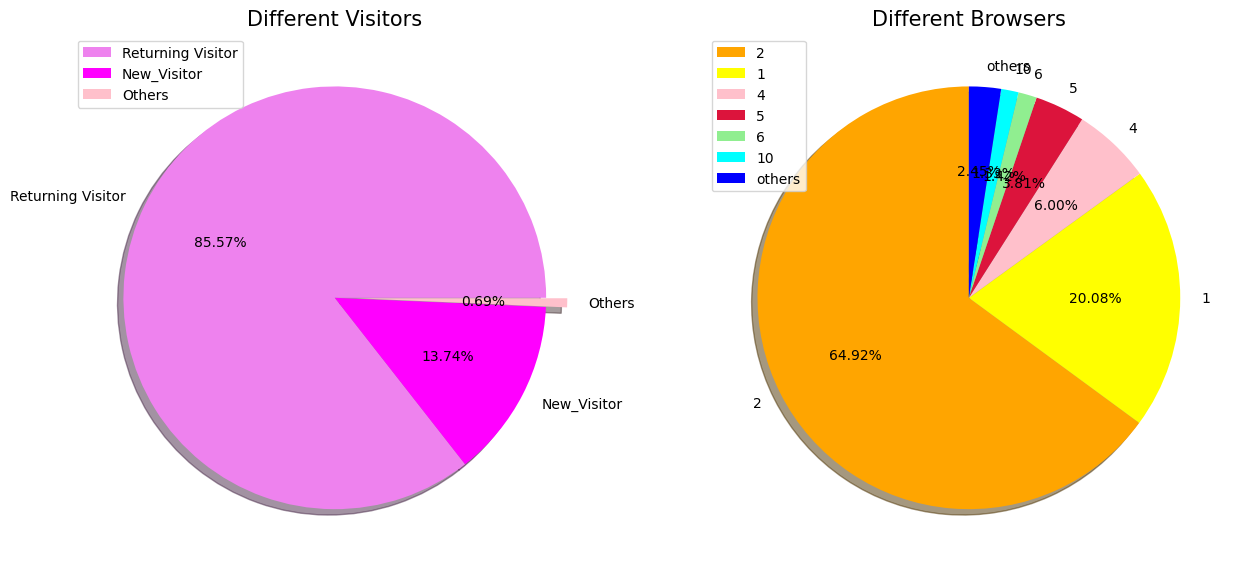

In [ ]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (15, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 15)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

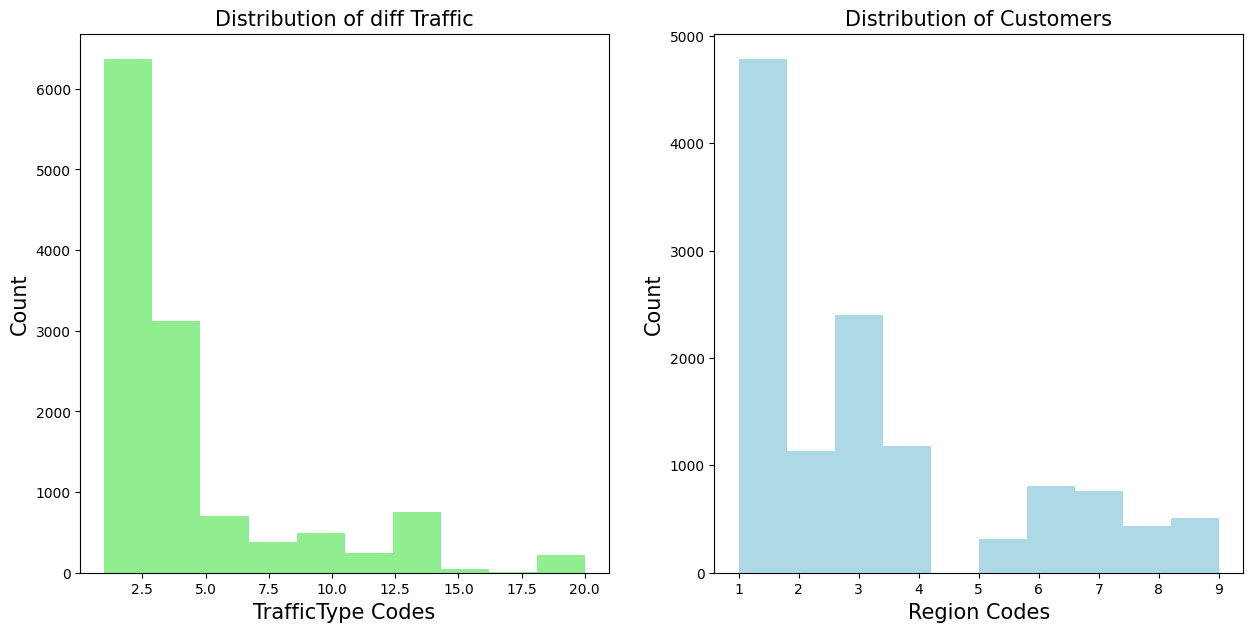

In [ ]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
plt.hist(x=df['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 15)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(x=df['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 15)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


In [ ]:
# checking the no. of OSes each user is having
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [ ]:
#checking the months with most no.of customers visiting the online shopping sites
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

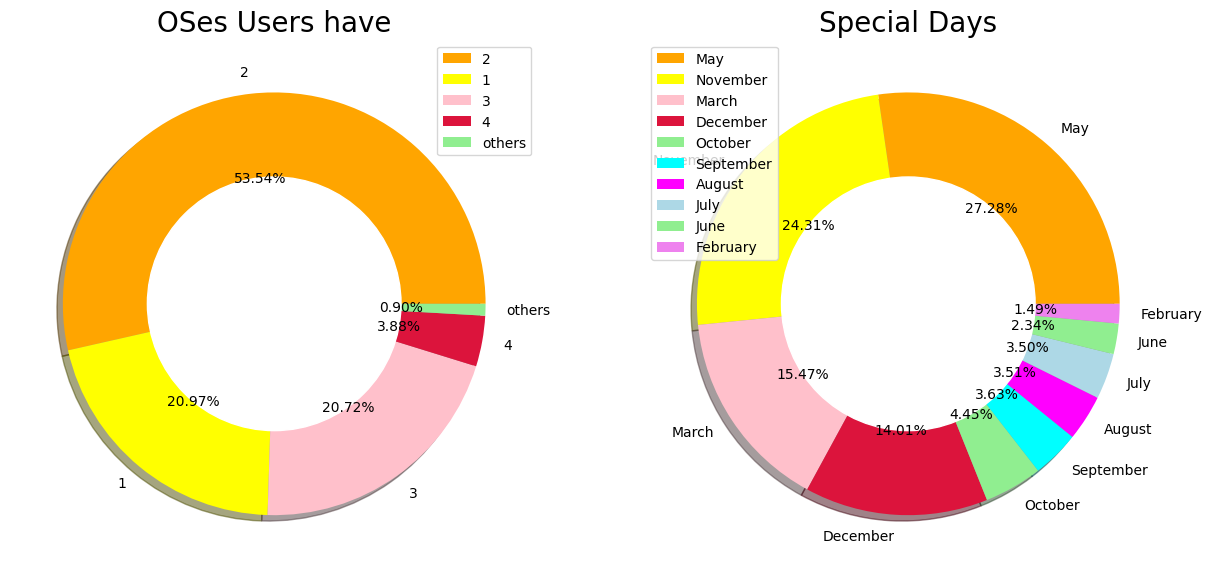

In [ ]:
# creating a donut chart for the months variations'
# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

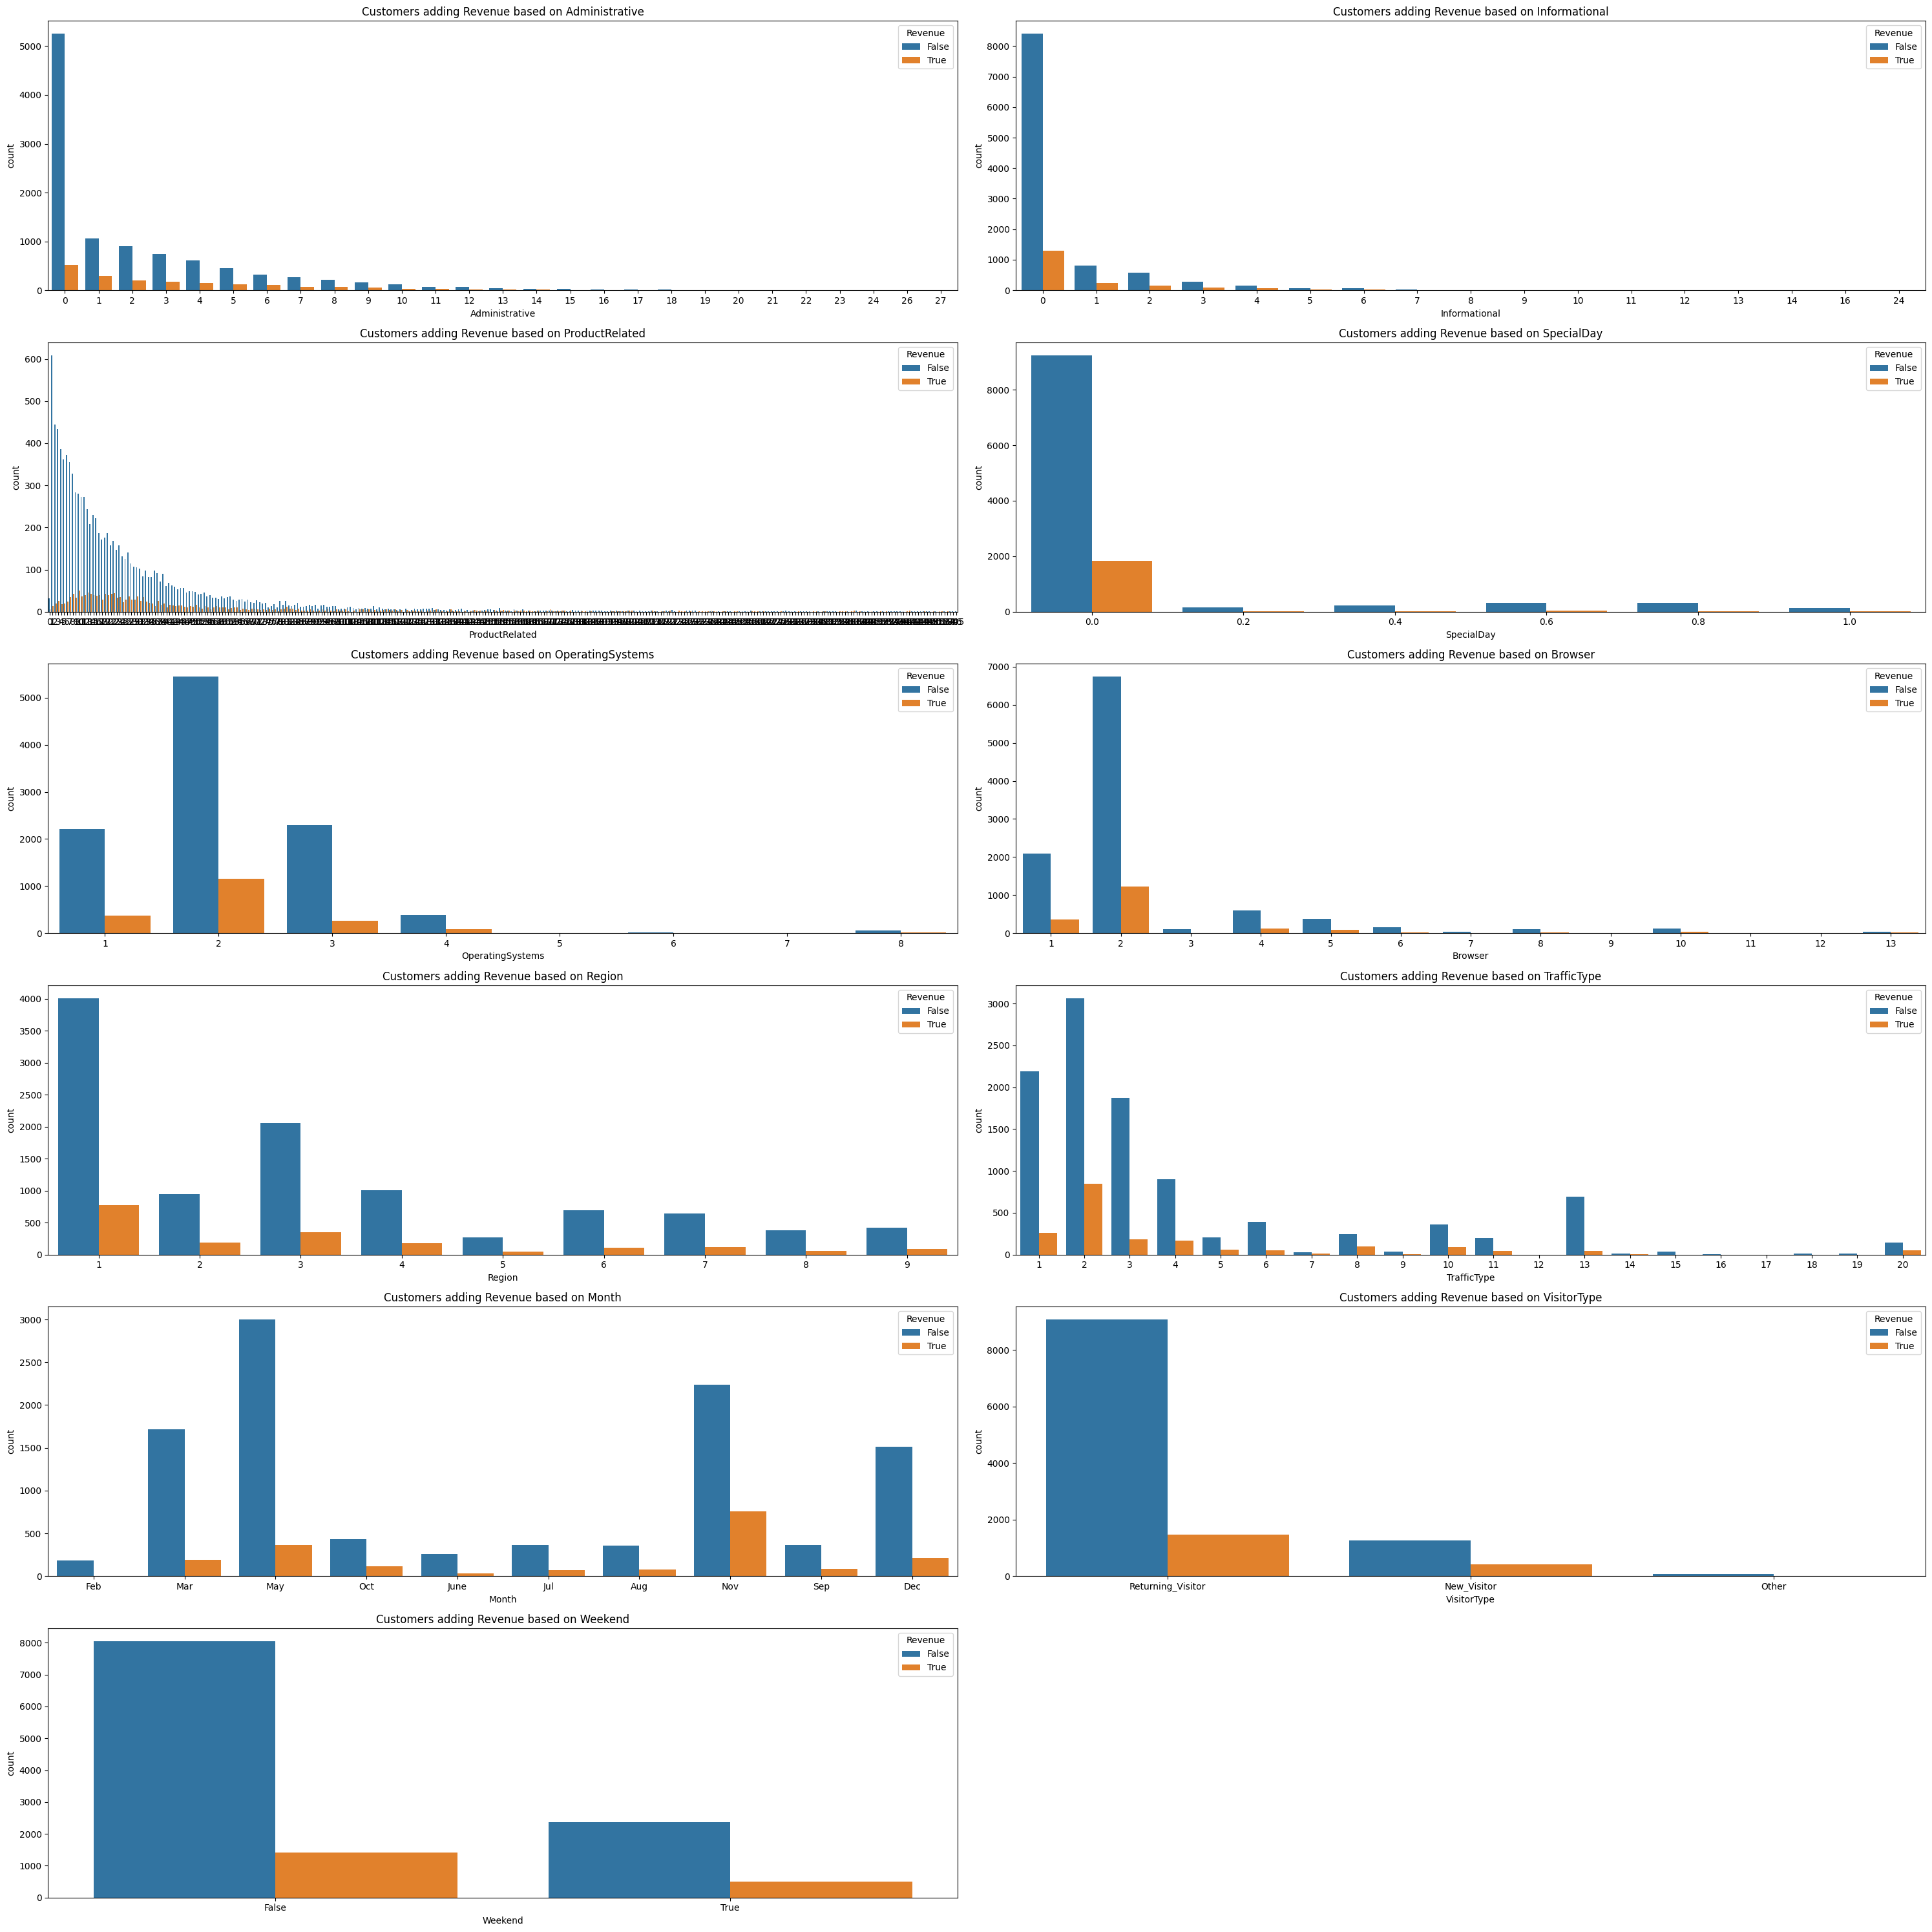

In [ ]:
column1l=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems',
          'Browser','Region','TrafficType','Month','VisitorType','Weekend']
plt.figure(figsize=(30,30))
plot_number = 0
for i in column1l:
    plot_number = plot_number + 1
    ax = plt.subplot(6, 2, plot_number,adjustable='datalim')
    sns.countplot(x=df[i],hue=df['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

#Multi-Variate Analysis

In [ ]:
!pip install bubbly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5430 sha256=e4947028cacc1c52925d8062bd2f062afc3e44d6a7febbc2d3ee3903b86d4e34
  Stored in directory: /root/.cache/pip/wheels/f7/b8/85/5fdfe7bcc88b1579581f046004f953b05c9ca7387fb373cf2d
Successfully built bubbly


In [ ]:
from plotly.offline import init_notebook_mode, iplot
from bubbly.bubbly import bubbleplot

df['Revenue']=df['Revenue'].astype('object')
figure = bubbleplot(dataset=df, x_column='BounceRates', y_column='ExitRates', z_column='ProductRelated', size_column='ProductRelated',color_column='Revenue',
    bubble_column='Revenue',x_title="BounceRates", y_title="ExitRates",z_title="ProductRelated", title='Bubble Plot', scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

In [ ]:
figure = bubbleplot(dataset=df, x_column='Administrative_Duration', y_column='Informational_Duration', z_column='ProductRelated_Duration',
    bubble_column='ProductRelated', size_column='ProductRelated',color_column='Revenue',
    x_title="Administrative_Duration", y_title="Informational_Duration",z_title="ProductRelated_Duration", title='Bubble Plot', scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

In [ ]:
df2=df.copy()

#Statistical Tests

##Statistical Test for Categorical column and Target Column

In [ ]:
cat_cols=['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

In [ ]:
#check weather Revenue is influenced by administrative column
#H0=proportion of revenue accross all the administrative category is same
#H1=proportion of revenue at least in two administrative category is different
scol=[]
spval=[]
ss=[]
for n in cat_cols:
    scol.append(n)
    cp=chi2_contingency(pd.crosstab(df2[n],df2['Revenue']))[1]
    spval.append(round(cp,4))
    if (cp<0.05):
        #rejects Null
        ss.append('*')#significant
    else:#Accepts Null
        ss.append('**')#not significant

In [ ]:
pd.DataFrame({'Feature':scol,'P-Value':spval,'Significance':ss})

Feature  P-Value Significance
0     Administrative   0.0000            *
1      Informational   0.0000            *
2     ProductRelated   0.0000            *
3              Month   0.0000            *
4   OperatingSystems   0.0000            *
5            Browser   0.0061            *
6             Region   0.3214           **
7        TrafficType   0.0000            *
8        VisitorType   0.0000            *
9            Weekend   0.0013            *
10        SpecialDay   0.0000            *

In [ ]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

In [ ]:
from scipy.stats import levene

#print('Two-Sample-T-Test of ','\n')
tcol=[]
tpval=[]
ts=[]
for n in numerical_columns:
    tcol.append(n)
    #splitting into 2 groups(Revenue=True, Revenue=False)
    g1=df2[n][df['Revenue']==False]
    g2=df2[n][df['Revenue']==True]
    #Test for normality(Shapiro Test)
    #H0:Data is normal
    #H0:Data is abnormal
    # if p<0.05---reject Null
    for b in [g1]:
        s,p=shapiro(b)
    for c in [g2]:
        s1,p1=shapiro(c)
    if (p>0.05 or p1>0.05):
        w,lp=levene(g1,g2)
    #If data doesn't pass normality or variance test, we do non-parametric Test
    if (p<=0.05 or p1<=0.05 or lp<=0.05):
        ms,mp=mannwhitneyu(g1,g2)

        tpval.append(round(mp,4))
        if (mp<0.05):
            ts.append('*')       #significant
        else:
            ts.append('**')      #not significant

In [ ]:
pd.DataFrame({'Feature':tcol,'P-Value':tpval,'Significant':ts})

Feature  P-Value Significant
0  Administrative_Duration      0.0           *
1   Informational_Duration      0.0           *
2  ProductRelated_Duration      0.0           *
3              BounceRates      0.0           *
4                ExitRates      0.0           *
5               PageValues      0.0           *

#Statistical Test for Numerical column and Target Column

In [ ]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

In [ ]:
from scipy.stats import levene

#print('Two-Sample-T-Test of ','\n')
tcol=[]
tpval=[]
ts=[]
for n in numerical_columns:
    tcol.append(n)
    #splitting into 2 groups(Revenue=True, Revenue=False)
    g1=df2[n][df['Revenue']==False]
    g2=df2[n][df['Revenue']==True]
    #Test for normality(Shapiro Test)
    #H0:Data is normal
    #H0:Data is abnormal
    # if p<0.05---reject Null
    for b in [g1]:
      s,p=shapiro(b)
    for c in [g2]:
        s1,p1=shapiro(c)
    if (p>0.05 or p1>0.05):
        w,lp=levene(g1,g2)
    #If data doesn't pass normality or variance test, we do non-parametric Test
    if (p<=0.05 or p1<=0.05 or lp<=0.05):
        ms,mp=mannwhitneyu(g1,g2)

        tpval.append(round(mp,4))
        if (mp<0.05):
            ts.append('*')       #significant
        else:
            ts.append('**')      #not significant

In [ ]:
pd.DataFrame({'Feature':tcol,'P-Value':tpval,'Significant':ts})

Feature  P-Value Significant
0  Administrative_Duration      0.0           *
1   Informational_Duration      0.0           *
2  ProductRelated_Duration      0.0           *
3              BounceRates      0.0           *
4                ExitRates      0.0           *
5               PageValues      0.0           *

#Outliers

<Axes: >

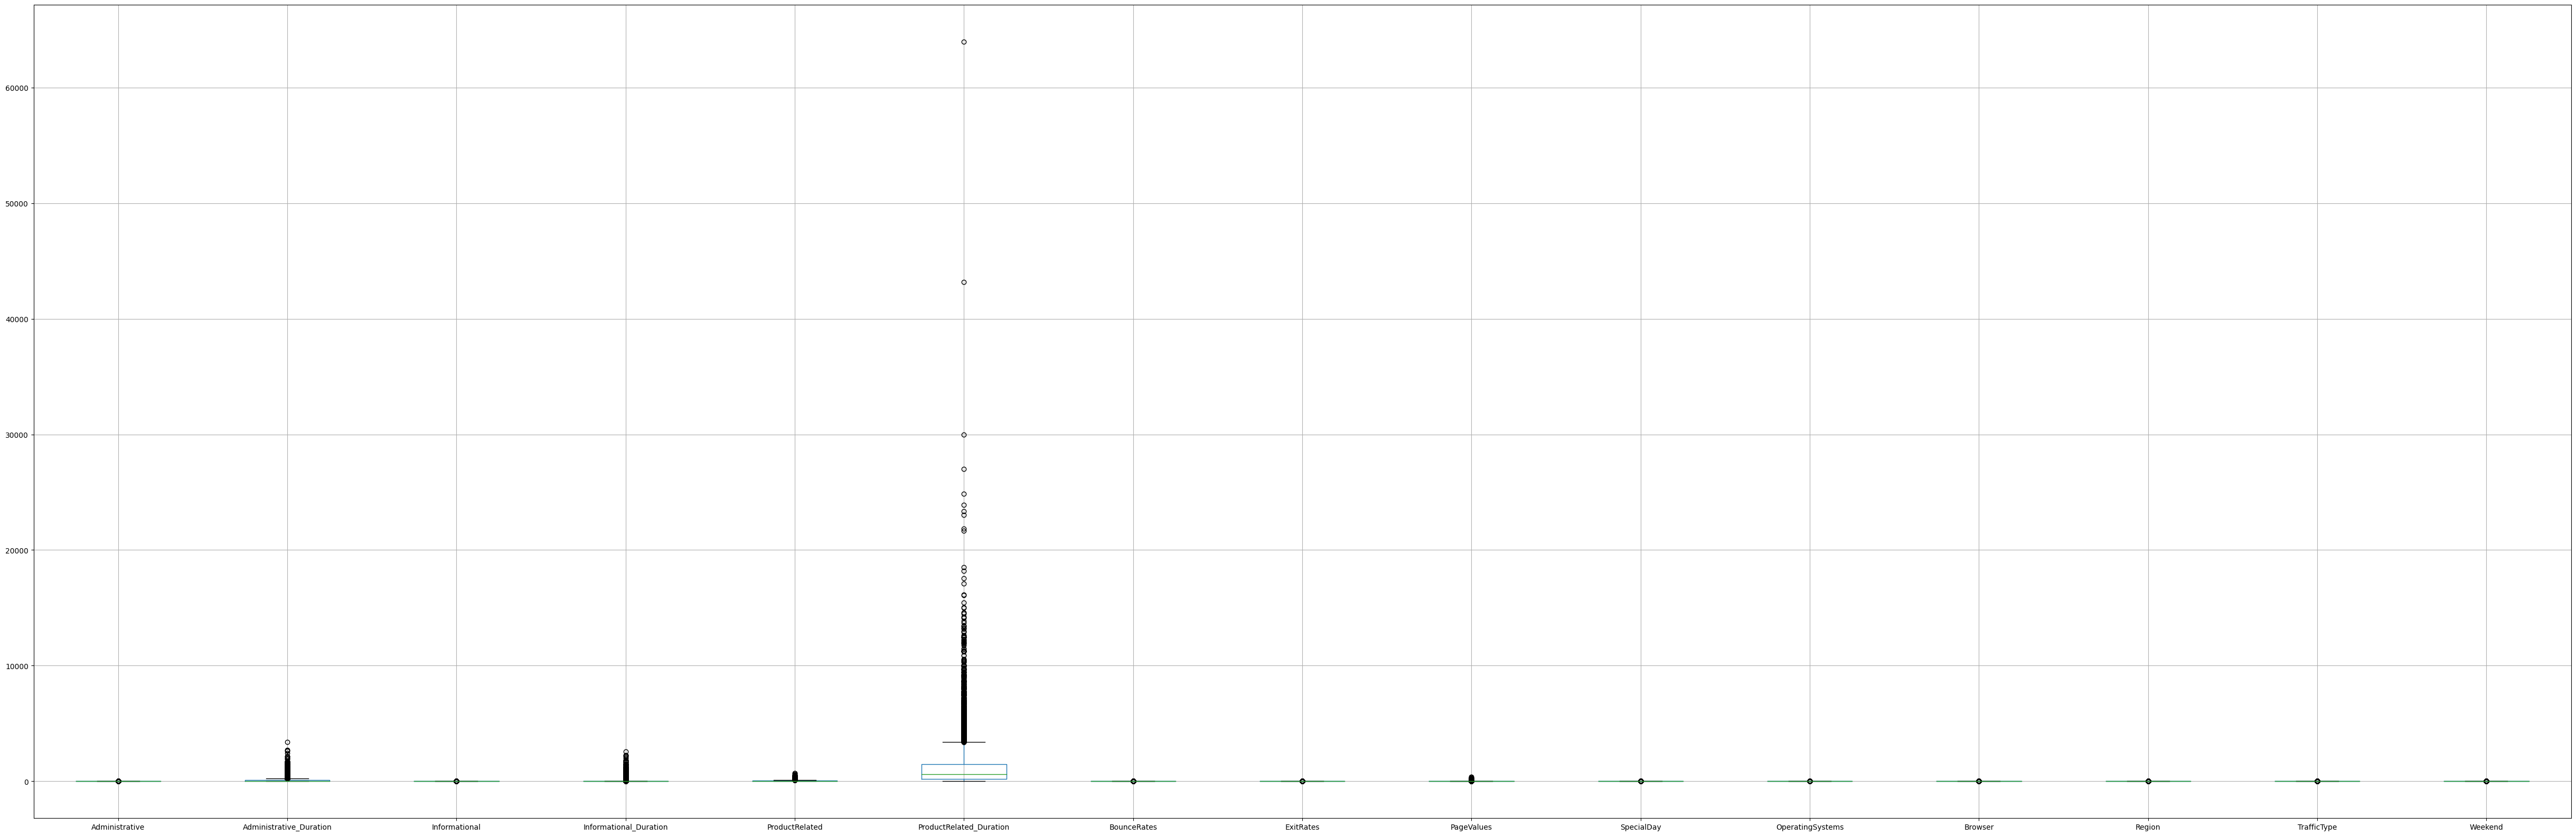

In [ ]:
plt.figure(figsize=(62,20))
df2.boxplot()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
num_col=['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

In [ ]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in num_col:
    data_mean, data_std = mean(df2[i]), std(df2[i])
# identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i,': \n')
# identify outliers
    outliers = [x for x in df2[i] if x < lower or x > upper]

    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in df2[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:',outlier_percent ,'\n')
    out_per.append(outlier_percent)

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12098
Percent of outlers: 1.8815896188158963 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12100
Percent of outlers: 1.8653690186536902 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12111
Percent of outlers: 1.7761557177615572 

BounceRates : 

Identified outliers: 708
Non-outlier observations: 11622
Percent of outlers: 5.742092457420925 

ExitRates : 

Identified outliers: 713
Non-outlier observations: 11617
Percent of outlers: 5.78264395782644 

PageValues : 

Identified outliers: 259
Non-outlier observations: 12071
Percent of outlers: 2.1005677210056772 



Visualize the Outliers

In [ ]:
Outliers=pd.DataFrame({'Feature':num_col,'% Of Outliers':out_per})
outlier_sorted=Outliers.sort_values('% Of Outliers',ascending=False)
outlier_sorted

Feature  % Of Outliers
4                ExitRates       5.782644
3              BounceRates       5.742092
5               PageValues       2.100568
0  Administrative_Duration       1.881590
1   Informational_Duration       1.865369
2  ProductRelated_Duration       1.776156

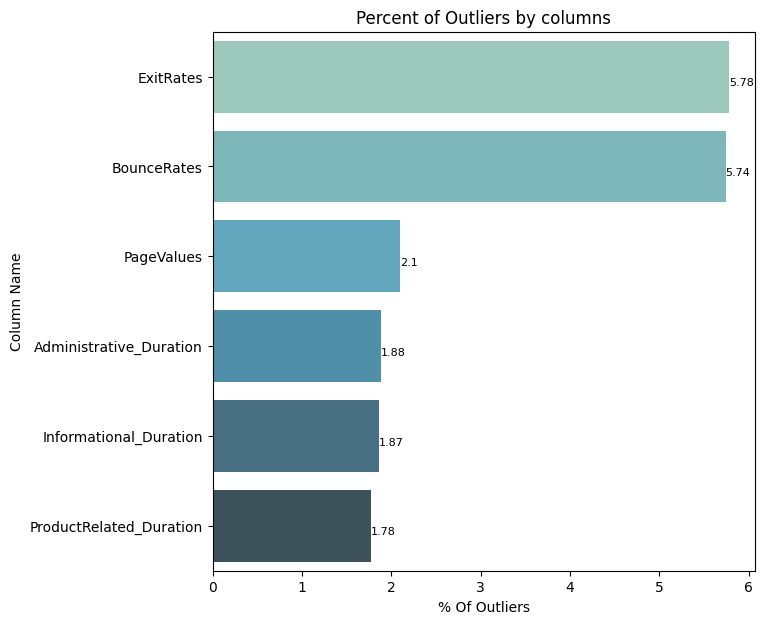

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(y=outlier_sorted['Feature'],x=outlier_sorted['% Of Outliers'],palette='GnBu_d')
plt.title('Percent of Outliers by columns')
plt.ylabel('Column Name')
for i, v in enumerate(list(outlier_sorted['% Of Outliers'])):
    plt.text(v,i-(-0.1),round(list(outlier_sorted['% Of Outliers'])[i],2),fontsize=8)



In [ ]:
df_copy=df2.copy()
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend Revenue  
0        1       1            1  Returning_Visitor    False   False  
1        2       1            2  Returning_Visitor    False   False  
2        1       9            3  Returning_Visitor    False   False  
3        2       2            4  Returning_Visitor    False   False  
4        3       1            4  Returning_Visitor     True   False

Visualize Feature Distribution Before Transformation

array([[<Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>],
       [<Axes: title={'center': 'ExitRates'}>,
        <Axes: title={'center': 'PageValues'}>]], dtype=object)

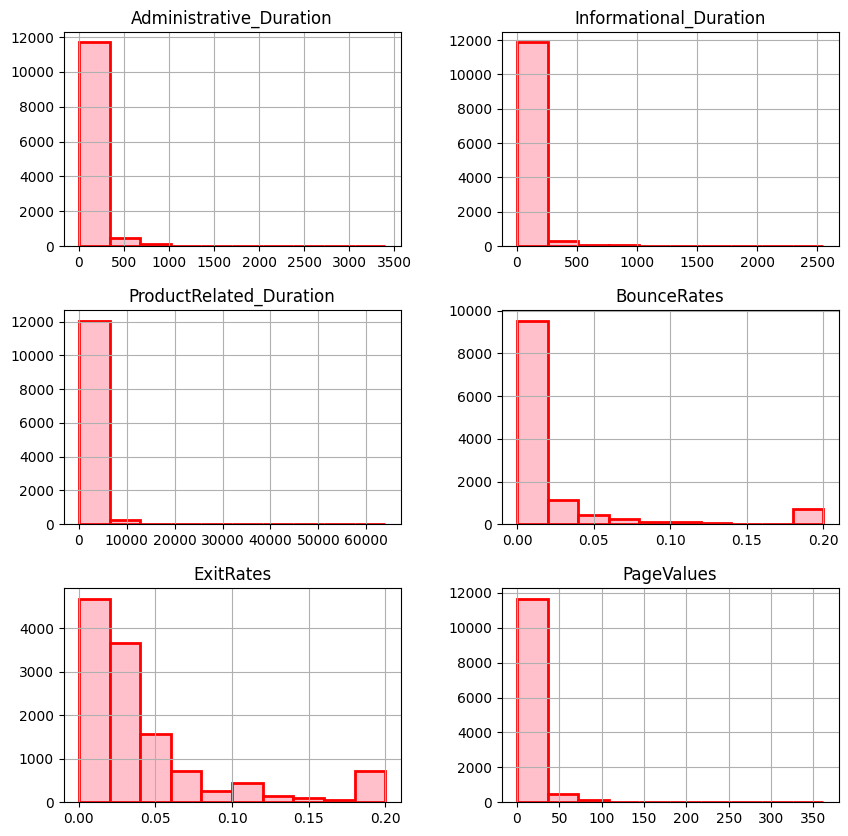

In [ ]:
df_copy.hist(column=num_col,figsize=(10,10),color = 'pink', ec='red', lw=2)

Transforming the columns with Box-Cox technique

In [ ]:
df_copy['Administrative_Duration']=1/(df['Administrative_Duration']+1)
df_copy['Informational_Duration'],i = st.boxcox(df['Informational_Duration']+1)
df_copy['ProductRelated_Duration'],pd = st.boxcox(df['ProductRelated_Duration']+1)
df_copy['BounceRates']= df['BounceRates']**0.2
df_copy['ExitRates']=df['ExitRates']**0.2
df_copy['PageValues'],p = st.boxcox(df['PageValues']+1)

Visualize Feature Distribution After Transformation

array([[<Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>],
       [<Axes: title={'center': 'ExitRates'}>,
        <Axes: title={'center': 'PageValues'}>]], dtype=object)

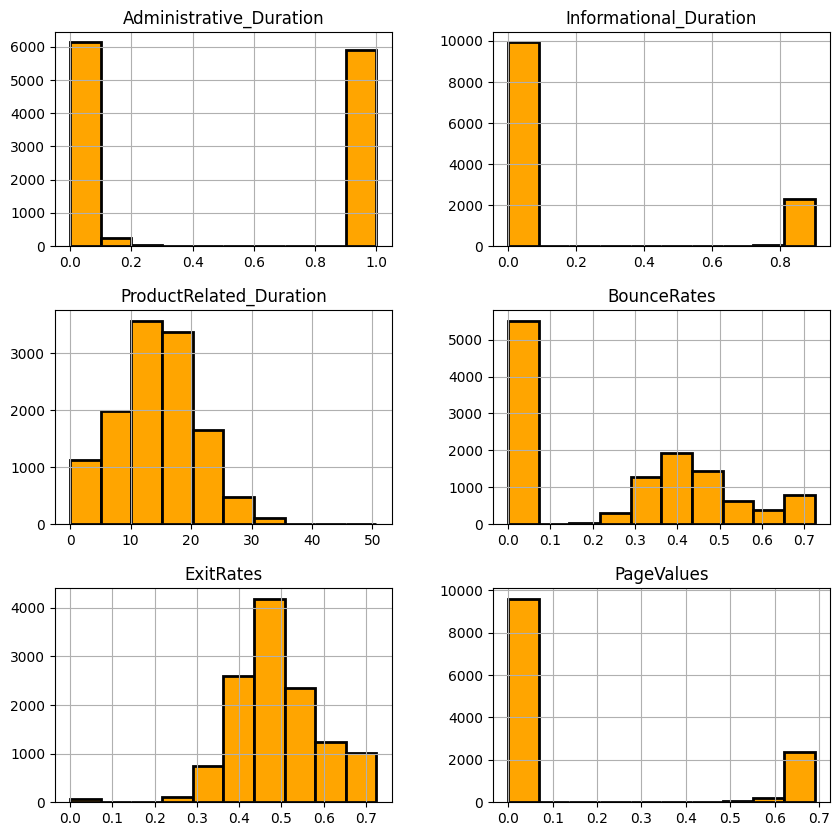

In [ ]:
df_copy.hist(column=num_col,figsize=(10,10),color = 'orange', ec='black', lw=2)

<Axes: >

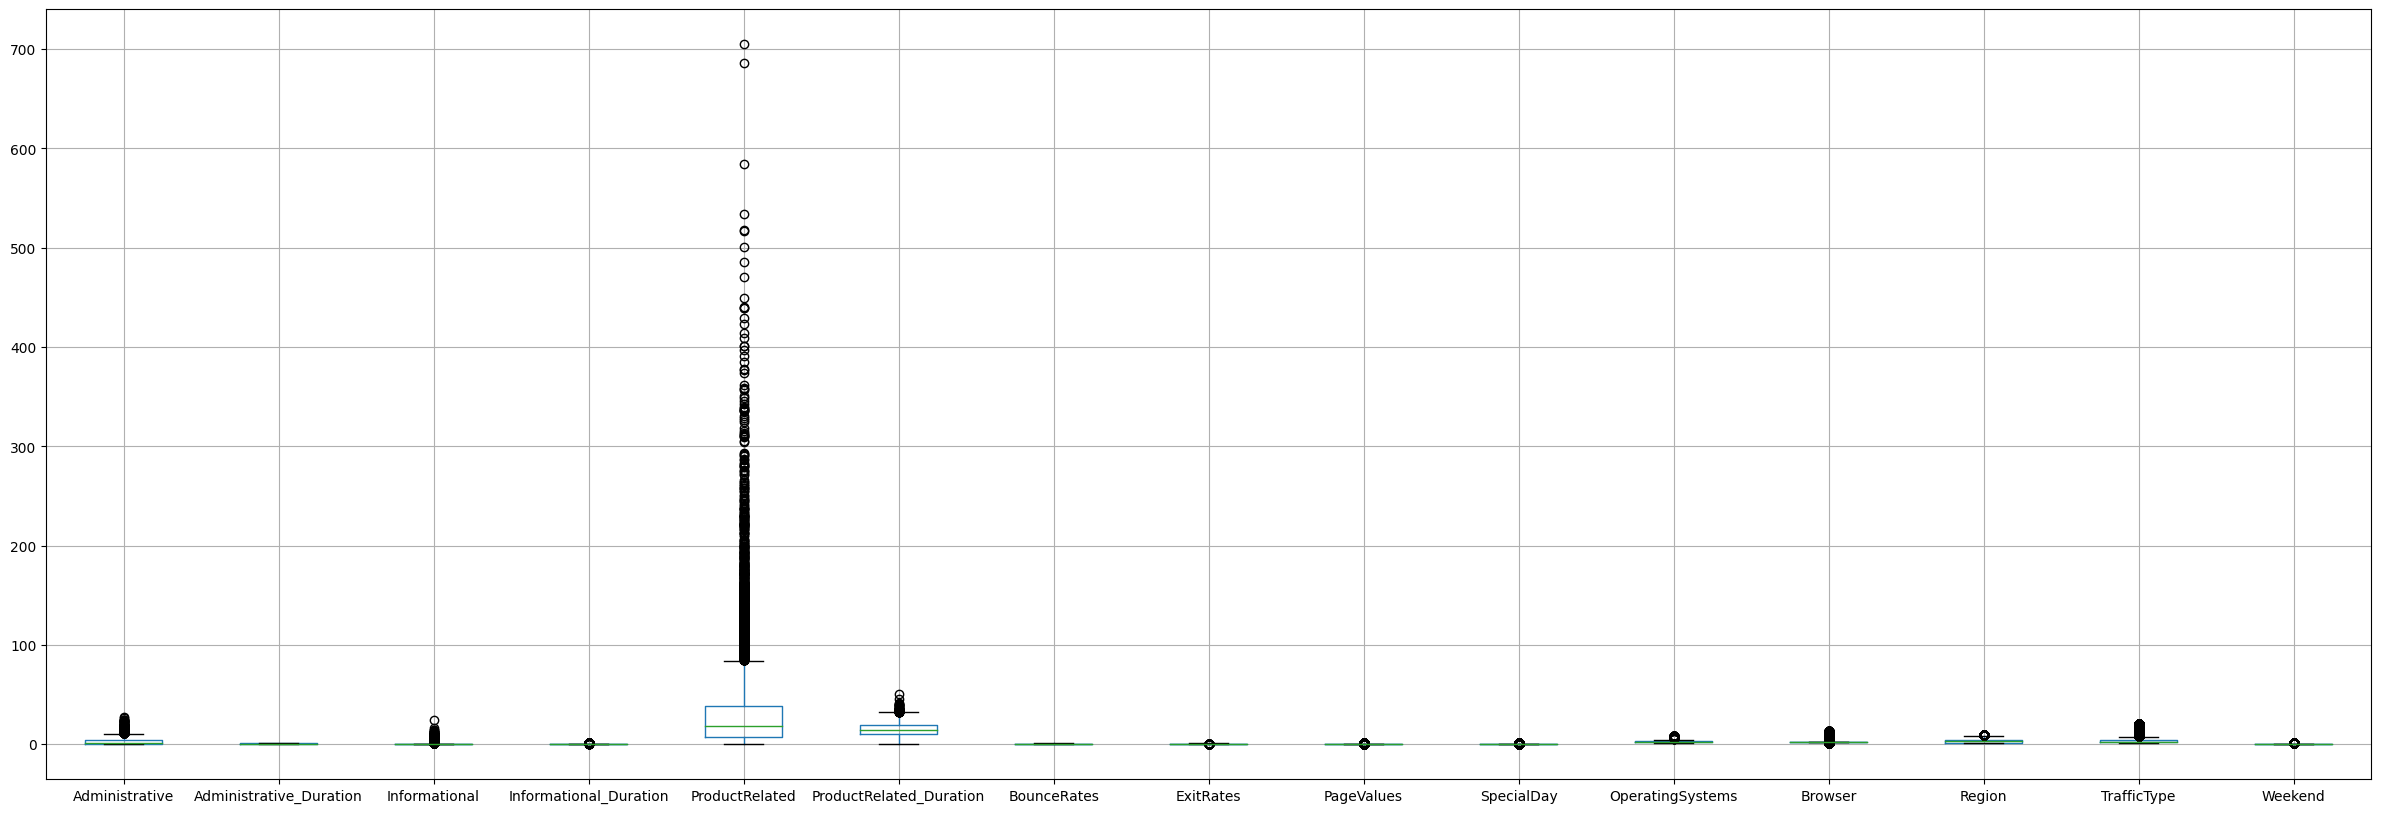

In [ ]:
plt.figure(figsize=(30,10))
df_copy.boxplot()

In [ ]:
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.724780   0.724780         0.0         0.0   Feb                 1   
1     0.000000   0.630957         0.0         0.0   Feb                 2   
2     0.724780   0.724780         0.0         0.0   Feb                 4   
3     0.549280   0.674879         0.0         0.0   Feb                 3   
4     0.457305   0.549280         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend Revenue  
0        1       1            1  Returning_Visitor    False   False  
1        2       1            2  Returning_Visitor    False   False  
2        1       9            3  Returning_Visitor    False   False  
3        2       2            4  Returning_Visitor    False   False  
4        3       1            4  Returning_Visitor     True   False

#Converting Numeric to Categorical

In [ ]:
df2.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend Revenue  
0        1       1            1  Returning_Visitor    False   False  
1        2       1            2  Returning_Visitor    False   False  
2        1       9            3  Returning_Visitor    False   False  
3        2       2            4  Returning_Visitor    False   False  
4        3       1            4  Returning_Visitor     True   False

WEEKEND AND REVENUE

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_copy['Weekend'] = le.fit_transform(df_copy['Weekend'])
df_copy['Revenue'] = le.fit_transform(df_copy['Revenue'])
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.724780   0.724780         0.0         0.0   Feb                 1   
1     0.000000   0.630957         0.0         0.0   Feb                 2   
2     0.724780   0.724780         0.0         0.0   Feb                 4   
3     0.549280   0.674879         0.0         0.0   Feb                 3   
4     0.457305   0.549280         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0

TRAFFIC TYPE

In [ ]:
df_copy['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [ ]:
top_10_traffic = [x for x in df_copy['TrafficType'].value_counts().sort_values(ascending=False).head(10).index]
top_10_traffic

[2, 1, 3, 4, 13, 10, 6, 8, 5, 11]

In [ ]:
def one_hot_top_x(dataframe,variable,top_x_labels):
    for label in top_x_labels:
        df_copy[variable+'_'+str(label)] = np.where(df_copy[variable]==label,1,0)

In [ ]:
one_hot_top_x(df_copy,'TrafficType',top_10_traffic)
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.724780   0.724780         0.0         0.0   Feb                 1   
1     0.000000   0.630957         0.0         0.0   Feb                 2   
2     0.724780   0.724780         0.0         0.0   Feb                 4   
3     0.549280   0.674879         0.0         0.0   Feb                 3   
4     0.457305   0.549280         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor        0        0   
1        2       1            2  Returning_Visitor        0        0   
2        1       9            3  Returning_Visitor        0        0   
3        2       2            4  Returning_Visitor        0        0   
4        3       1            4  Returning_Visitor        1        0   

   TrafficType_2  TrafficType_1  TrafficType_3  TrafficType_4  TrafficType_13  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              0              1              0               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   TrafficType_10  TrafficType_6  TrafficType_8  TrafficType_5  TrafficType_11  
0               0              0              0              0               0  
1               0              0              0              0               0  
2               0              0              0              0               0  
3               0              0              0              0               0  
4               0              0              0              0               0

BROWSER

In [ ]:
top_8_browser = [x for x in df_copy['Browser'].value_counts().sort_values(ascending=False).head(8).index]
top_8_browser

[2, 1, 4, 5, 6, 10, 8, 3]

In [ ]:
one_hot_top_x(df_copy,'Browser',top_8_browser)
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.724780   0.724780         0.0         0.0   Feb                 1   
1     0.000000   0.630957         0.0         0.0   Feb                 2   
2     0.724780   0.724780         0.0         0.0   Feb                 4   
3     0.549280   0.674879         0.0         0.0   Feb                 3   
4     0.457305   0.549280         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor        0        0   
1        2       1            2  Returning_Visitor        0        0   
2        1       9            3  Returning_Visitor        0        0   
3        2       2            4  Returning_Visitor        0        0   
4        3       1            4  Returning_Visitor        1        0   

   TrafficType_2  TrafficType_1  TrafficType_3  TrafficType_4  TrafficType_13  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              0              1              0               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   TrafficType_10  TrafficType_6  TrafficType_8  TrafficType_5  \
0               0              0              0              0   
1               0              0              0              0   
2               0              0              0              0   
3               0              0              0              0   
4               0              0              0              0   

   TrafficType_11  Browser_2  Browser_1  Browser_4  Browser_5  Browser_6  \
0               0          0          1          0          0          0   
1               0          1          0          0          0          0   
2               0          0          1          0          0          0   
3               0          1          0          0          0          0   
4               0          0          0          0          0          0   

   Browser_10  Browser_8  Browser_3  
0           0          0          0  
1           0          0          0  
2           0          0          0  
3           0          0          0  
4           0          0          1

MONTH

<Axes: >

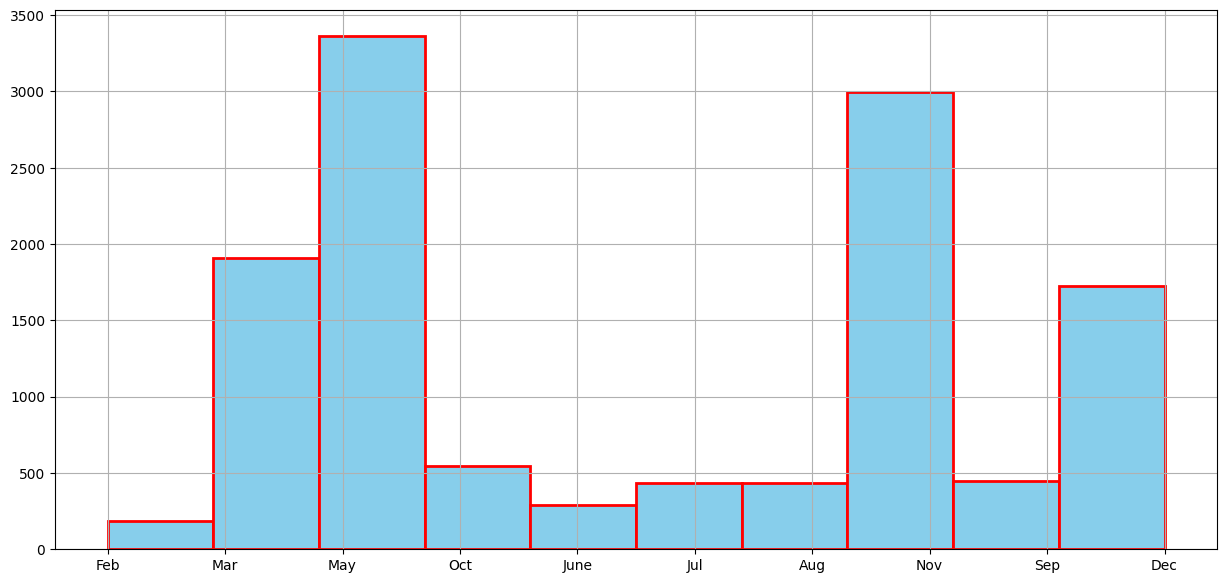

In [ ]:
df_copy.Month.hist(color = 'skyblue', ec='red', lw=2)

In [ ]:
top_8_month = [x for x in df_copy['Month'].value_counts().sort_values(ascending=False).head(8).index]
top_8_month

['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul']

In [ ]:
one_hot_top_x(df_copy,'Month',top_8_month)
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.724780   0.724780         0.0         0.0   Feb                 1   
1     0.000000   0.630957         0.0         0.0   Feb                 2   
2     0.724780   0.724780         0.0         0.0   Feb                 4   
3     0.549280   0.674879         0.0         0.0   Feb                 3   
4     0.457305   0.549280         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor        0        0   
1        2       1            2  Returning_Visitor        0        0   
2        1       9            3  Returning_Visitor        0        0   
3        2       2            4  Returning_Visitor        0        0   
4        3       1            4  Returning_Visitor        1        0   

   TrafficType_2  TrafficType_1  TrafficType_3  TrafficType_4  TrafficType_13  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              0              1              0               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   TrafficType_10  TrafficType_6  TrafficType_8  TrafficType_5  \
0               0              0              0              0   
1               0              0              0              0   
2               0              0              0              0   
3               0              0              0              0   
4               0              0              0              0   

   TrafficType_11  Browser_2  Browser_1  Browser_4  Browser_5  Browser_6  \
0               0          0          1          0          0          0   
1               0          1          0          0          0          0   
2               0          0          1          0          0          0   
3               0          1          0          0          0          0   
4               0          0          0          0          0          0   

   Browser_10  Browser_8  Browser_3  Month_May  Month_Nov  Month_Mar  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          1          0          0          0   

   Month_Dec  Month_Oct  Month_Sep  Month_Aug  Month_Jul  
0          0          0          0          0          0  
1          0          0          0          0          0  
2          0          0          0          0          0  
3          0          0          0          0          0  
4          0          0          0          0          0

OPERATING SYSTEM

In [ ]:
top_5_os = [x for x in df_copy['OperatingSystems'].value_counts().sort_values(ascending=False).head(5).index]
top_5_os

[2, 1, 3, 4, 8]

In [ ]:
one_hot_top_x(df_copy,'OperatingSystems',top_5_os)
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.724780   0.724780         0.0         0.0   Feb                 1   
1     0.000000   0.630957         0.0         0.0   Feb                 2   
2     0.724780   0.724780         0.0         0.0   Feb                 4   
3     0.549280   0.674879         0.0         0.0   Feb                 3   
4     0.457305   0.549280         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor        0        0   
1        2       1            2  Returning_Visitor        0        0   
2        1       9            3  Returning_Visitor        0        0   
3        2       2            4  Returning_Visitor        0        0   
4        3       1            4  Returning_Visitor        1        0   

   TrafficType_2  TrafficType_1  TrafficType_3  TrafficType_4  TrafficType_13  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              0              1              0               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   TrafficType_10  TrafficType_6  TrafficType_8  TrafficType_5  \
0               0              0              0              0   
1               0              0              0              0   
2               0              0              0              0   
3               0              0              0              0   
4               0              0              0              0   

   TrafficType_11  Browser_2  Browser_1  Browser_4  Browser_5  Browser_6  \
0               0          0          1          0          0          0   
1               0          1          0          0          0          0   
2               0          0          1          0          0          0   
3               0          1          0          0          0          0   
4               0          0          0          0          0          0   

   Browser_10  Browser_8  Browser_3  Month_May  Month_Nov  Month_Mar  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          1          0          0          0   

   Month_Dec  Month_Oct  Month_Sep  Month_Aug  Month_Jul  OperatingSystems_2  \
0          0          0          0          0          0                   0   
1          0          0          0          0          0                   1   
2          0          0          0          0          0                   0   
3          0          0          0          0          0                   0   
4          0          0          0          0          0                   0   

   OperatingSystems_1  OperatingSystems_3  OperatingSystems_4  \

VISITOR TYPE

In [ ]:
labels = [x for x in df_copy['VisitorType'].value_counts().sort_values(ascending=False).head().index]
labels

['Returning_Visitor', 'New_Visitor', 'Other']

In [ ]:
def one_hot_encode(dataframe,variable,labels):
    for label in labels:
        df_copy[variable+'_'+str(label)] = np.where(df_copy[variable]==label,1,0)
one_hot_encode(df_copy,'VisitorType',labels)

In [ ]:
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.724780   0.724780         0.0         0.0   Feb                 1   
1     0.000000   0.630957         0.0         0.0   Feb                 2   
2     0.724780   0.724780         0.0         0.0   Feb                 4   
3     0.549280   0.674879         0.0         0.0   Feb                 3   
4     0.457305   0.549280         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor        0        0   
1        2       1            2  Returning_Visitor        0        0   
2        1       9            3  Returning_Visitor        0        0   
3        2       2            4  Returning_Visitor        0        0   
4        3       1            4  Returning_Visitor        1        0   

   TrafficType_2  TrafficType_1  TrafficType_3  TrafficType_4  TrafficType_13  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              0              1              0               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   TrafficType_10  TrafficType_6  TrafficType_8  TrafficType_5  \
0               0              0              0              0   
1               0              0              0              0   
2               0              0              0              0   
3               0              0              0              0   
4               0              0              0              0   

   TrafficType_11  Browser_2  Browser_1  Browser_4  Browser_5  Browser_6  \
0               0          0          1          0          0          0   
1               0          1          0          0          0          0   
2               0          0          1          0          0          0   
3               0          1          0          0          0          0   
4               0          0          0          0          0          0   

   Browser_10  Browser_8  Browser_3  Month_May  Month_Nov  Month_Mar  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          1          0          0          0   

   Month_Dec  Month_Oct  Month_Sep  Month_Aug  Month_Jul  OperatingSystems_2  \
0          0          0          0          0          0                   0   
1          0          0          0          0          0                   1   
2          0          0          0          0          0                   0   
3          0          0          0          0          0                   0   
4          0          0          0          0          0                   0   

   OperatingSystems_1  OperatingSystems_3  OperatingSystems_4  \

#Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

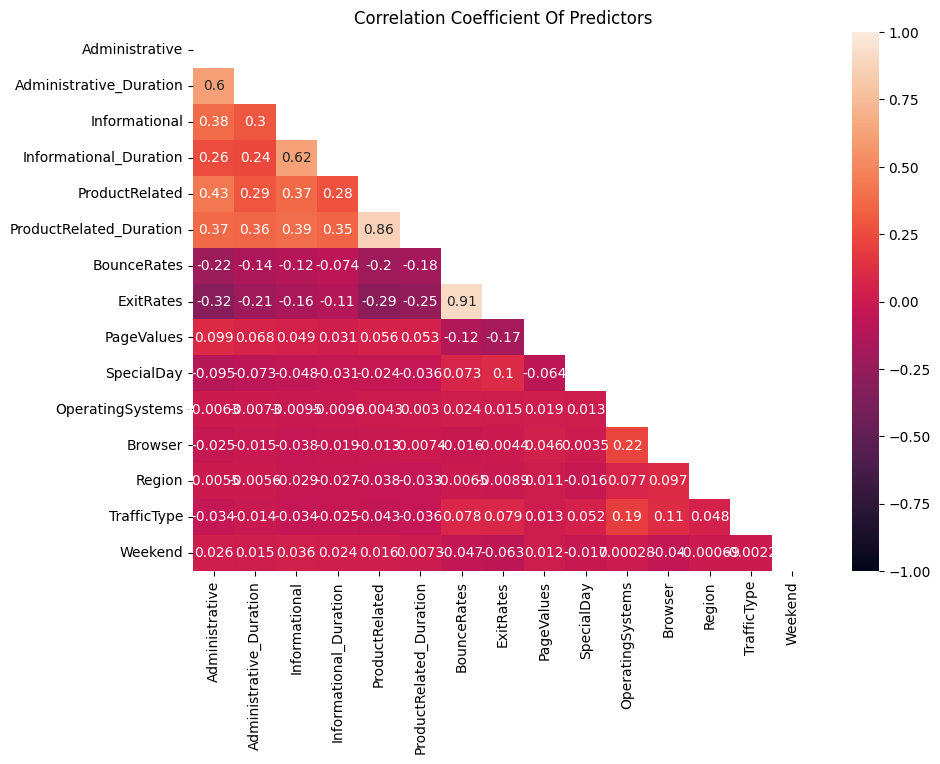

In [ ]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df2.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df2.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

Observation :

The Exit rates feature has a high coefficient value of 0.91 in Heat Map Visualization. This feature will be removed later.

In [ ]:
df_vif=df_copy[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']]

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df_vif

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative_Duration  12330 non-null  float64
 1   Informational_Duration   12330 non-null  float64
 2   ProductRelated_Duration  12330 non-null  float64
 3   BounceRates              12330 non-null  float64
 4   ExitRates                12330 non-null  float64
 5   PageValues               12330 non-null  float64
dtypes: float64(6)
memory usage: 578.1 KB


In [ ]:
calc_vif(X)

variables       VIF
0  Administrative_Duration  2.770116
1   Informational_Duration  1.508170
2  ProductRelated_Duration  4.816875
3              BounceRates  2.746530
4                ExitRates  8.894651
5               PageValues  1.527322

In [ ]:
df_copy.shape

(12330, 52)

In [ ]:
df_copy.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.724780   0.724780         0.0         0.0   Feb                 1   
1     0.000000   0.630957         0.0         0.0   Feb                 2   
2     0.724780   0.724780         0.0         0.0   Feb                 4   
3     0.549280   0.674879         0.0         0.0   Feb                 3   
4     0.457305   0.549280         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor        0        0   
1        2       1            2  Returning_Visitor        0        0   
2        1       9            3  Returning_Visitor        0        0   
3        2       2            4  Returning_Visitor        0        0   
4        3       1            4  Returning_Visitor        1        0   

   TrafficType_2  TrafficType_1  TrafficType_3  TrafficType_4  TrafficType_13  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              0              1              0               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   TrafficType_10  TrafficType_6  TrafficType_8  TrafficType_5  \
0               0              0              0              0   
1               0              0              0              0   
2               0              0              0              0   
3               0              0              0              0   
4               0              0              0              0   

   TrafficType_11  Browser_2  Browser_1  Browser_4  Browser_5  Browser_6  \
0               0          0          1          0          0          0   
1               0          1          0          0          0          0   
2               0          0          1          0          0          0   
3               0          1          0          0          0          0   
4               0          0          0          0          0          0   

   Browser_10  Browser_8  Browser_3  Month_May  Month_Nov  Month_Mar  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          1          0          0          0   

   Month_Dec  Month_Oct  Month_Sep  Month_Aug  Month_Jul  OperatingSystems_2  \
0          0          0          0          0          0                   0   
1          0          0          0          0          0                   1   
2          0          0          0          0          0                   0   
3          0          0          0          0          0                   0   
4          0          0          0          0          0                   0   

   OperatingSystems_1  OperatingSystems_3  OperatingSystems_4  \

#Droping columns that have high Multicollinearity

In [ ]:
df_final = df_copy.drop(['Month','OperatingSystems','Browser','TrafficType'],axis=1)
df_final.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay  Region        VisitorType  \
0     0.724780   0.724780         0.0         0.0       1  Returning_Visitor   
1     0.000000   0.630957         0.0         0.0       1  Returning_Visitor   
2     0.724780   0.724780         0.0         0.0       9  Returning_Visitor   
3     0.549280   0.674879         0.0         0.0       2  Returning_Visitor   
4     0.457305   0.549280         0.0         0.0       1  Returning_Visitor   

   Weekend  Revenue  TrafficType_2  TrafficType_1  TrafficType_3  \
0        0        0              0              1              0   
1        0        0              1              0              0   
2        0        0              0              0              1   
3        0        0              0              0              0   
4        1        0              0              0              0   

   TrafficType_4  TrafficType_13  TrafficType_10  TrafficType_6  \
0              0               0               0              0   
1              0               0               0              0   
2              0               0               0              0   
3              1               0               0              0   
4              1               0               0              0   

   TrafficType_8  TrafficType_5  TrafficType_11  Browser_2  Browser_1  \
0              0              0               0          0          1   
1              0              0               0          1          0   
2              0              0               0          0          1   
3              0              0               0          1          0   
4              0              0               0          0          0   

   Browser_4  Browser_5  Browser_6  Browser_10  Browser_8  Browser_3  \
0          0          0          0           0          0          0   
1          0          0          0           0          0          0   
2          0          0          0           0          0          0   
3          0          0          0           0          0          0   
4          0          0          0           0          0          1   

   Month_May  Month_Nov  Month_Mar  Month_Dec  Month_Oct  Month_Sep  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Month_Aug  Month_Jul  OperatingSystems_2  OperatingSystems_1  \
0          0          0                   0                   1   
1          0          0                   1                   0   
2          0          0                   0                   0   
3          0          0                   0                   0   
4          0          0                   0                   0   

   OperatingSystems_3  OperatingSystems_4  OperatingSystems_8  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0    

In [ ]:
df_final.drop('VisitorType',axis=1,inplace=True)

In [ ]:
df_final.drop('Region',axis=1,inplace=True)

In [ ]:
df_final.shape

(12330, 46)

In [ ]:
df_final.head()

Administrative  Administrative_Duration  Informational  \
0               0                      1.0              0   
1               0                      1.0              0   
2               0                      1.0              0   
3               0                      1.0              0   
4               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Revenue  \
0     0.724780   0.724780         0.0         0.0        0        0   
1     0.000000   0.630957         0.0         0.0        0        0   
2     0.724780   0.724780         0.0         0.0        0        0   
3     0.549280   0.674879         0.0         0.0        0        0   
4     0.457305   0.549280         0.0         0.0        1        0   

   TrafficType_2  TrafficType_1  TrafficType_3  TrafficType_4  TrafficType_13  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              0              1              0               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   TrafficType_10  TrafficType_6  TrafficType_8  TrafficType_5  \
0               0              0              0              0   
1               0              0              0              0   
2               0              0              0              0   
3               0              0              0              0   
4               0              0              0              0   

   TrafficType_11  Browser_2  Browser_1  Browser_4  Browser_5  Browser_6  \
0               0          0          1          0          0          0   
1               0          1          0          0          0          0   
2               0          0          1          0          0          0   
3               0          1          0          0          0          0   
4               0          0          0          0          0          0   

   Browser_10  Browser_8  Browser_3  Month_May  Month_Nov  Month_Mar  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          1          0          0          0   

   Month_Dec  Month_Oct  Month_Sep  Month_Aug  Month_Jul  OperatingSystems_2  \
0          0          0          0          0          0                   0   
1          0          0          0          0          0                   1   
2          0          0          0          0          0                   0   
3          0          0          0          0          0                   0   
4          0          0          0          0          0                   0   

   OperatingSystems_1  OperatingSystems_3  OperatingSystems_4  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   0                   0                   1   
3                   0                   1                   0   
4                   0                   1                   0   

   OperatingSystems_8  VisitorType_Returning_Visitor  VisitorType_New_Visitor  \
0                   0                              1         

#PCA

In [ ]:
X=df_final.drop(columns=['Revenue'],axis=1)
y=df_final['Revenue']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs_pca=ss.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(Xs_pca)

Weights or Loadings of Principal Components

Principal Components Weights (Eigenvectors)

In [ ]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

0         1         2         3         4         5         6   \
0  0.345557 -0.343096  0.282005  0.293526  0.318837  0.368365 -0.172632   
1 -0.006105 -0.055645 -0.062573 -0.060536 -0.128345 -0.090894 -0.186803   
2  0.132184 -0.040711  0.218846  0.207941  0.189871  0.142625  0.266639   
3  0.011581  0.007090  0.063159  0.043869 -0.007853 -0.049295  0.143798   
4  0.074979 -0.106604  0.047656  0.056968 -0.059224 -0.047767  0.026842   

         7         8         9         10        11        12        13  \
0 -0.337968  0.252936 -0.105377  0.034223  0.185980 -0.071338 -0.118538   
1 -0.138549 -0.009019 -0.117234  0.067382  0.136912 -0.119063  0.021512   
2  0.125566  0.067342  0.058741  0.036655 -0.102364  0.049865  0.111112   
3  0.101619 -0.077787 -0.267263  0.081055  0.053228  0.046939 -0.106651   
4 -0.032755  0.008613  0.290355  0.089617 -0.036945 -0.312386  0.011299   

         14        15        16        17        18        19        20  \
0 -0.007954 -0.058483  0.005041 -0.013199  0.028998  0.027522 -0.016663   
1 -0.033943 -0.173915  0.010770 -0.060622  0.102276  0.081958  0.005239   
2  0.041984  0.020416  0.034224 -0.014759 -0.082818 -0.099698 -0.012808   
3 -0.242210  0.131395  0.124484 -0.086895  0.092371 -0.065981  0.065627   
4  0.248942  0.181042 -0.110841  0.082369  0.003720  0.132438  0.074709   

         21        22        23        24        25        26        27  \
0  0.080806 -0.079853  0.005297 -0.000241 -0.008638  0.007533 -0.036862   
1 -0.376367  0.419756  0.007267 -0.003073 -0.017400 -0.001737  0.075351   
2 -0.221098  0.334119 -0.081545 -0.031629 -0.000681 -0.018875  0.052892   
3  0.237815 -0.049558 -0.238762 -0.161355 -0.094954 -0.108675  0.007882   
4  0.162958  0.002353 -0.186549 -0.134517 -0.078044 -0.069266  0.016290   

         28        29        30        31        32        33        34  \
0 -0.031282 -0.095194  0.094512 -0.043175  0.008253  0.051445  0.040725   
1  0.004962 -0.121862  0.019844  0.015690  0.080857  0.054270  0.017768   
2  0.005385  0.056558  0.052795 -0.048065 -0.083494 -0.013958 -0.042916   
3  0.078389 -0.394303  0.237168  0.069638  0.180947 -0.022821 -0.010778   
4  0.104281  0.389682 -0.130409 -0.254215 -0.114127  0.026940  0.040228   

         35        36        37        38        39        40        41  \
0  0.026462 -0.000928  0.109393 -0.079883 -0.049042 -0.004265 -0.013666   
1  0.006650 -0.016098 -0.250074  0.409916 -0.158569  0.082213  0.076695   
2  0.003729  0.022976 -0.285176  0.322160  0.012575  0.067241 -0.091430   
3 -0.026107  0.005731 -0.328936 -0.018447  0.402063 -0.019752  0.157842   
4  0.012579  0.003517 -0.295948  0.018212  0.350822  0.002112 -0.034662   

         42        43        44  
0 -0.093282  0.099680 -0.018595  
1 -0.308099  0.295837  0.077523  
2  0.391264 -0.375246 -0.100310  
3 -0.047110  0.009166  0.161923  
4 -0.189705  0.203064 -0.039262

In [ ]:
pca.explained_variance_ratio_

array([8.81288529e-02, 6.72609832e-02, 5.85923116e-02, 4.44538335e-02,
       4.28332259e-02, 3.82635160e-02, 3.25910352e-02, 2.98513779e-02,
       2.92154690e-02, 2.83940403e-02, 2.79575215e-02, 2.56817207e-02,
       2.52466588e-02, 2.49555508e-02, 2.42306055e-02, 2.38893107e-02,
       2.34276162e-02, 2.33546738e-02, 2.30262912e-02, 2.26425178e-02,
       2.25170154e-02, 2.22046070e-02, 2.19677138e-02, 2.13714231e-02,
       2.08358362e-02, 2.04998524e-02, 1.88548733e-02, 1.82036487e-02,
       1.77320362e-02, 1.67749703e-02, 1.65473216e-02, 1.57471801e-02,
       1.52082012e-02, 1.13905695e-02, 8.02339566e-03, 7.68252211e-03,
       5.74869714e-03, 4.85913111e-03, 4.48035035e-03, 3.24487683e-03,
       1.02246015e-03, 7.15063949e-04, 2.81305969e-04, 8.98353922e-05,
       1.73803517e-32])

In [ ]:
Xc=Xs_pca.astype(float)
cov_matrix = np.cov(X_pca.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 3.96612005e+00  3.73454208e-16 -1.02354116e-15 ...  1.08059667e-18
   6.84377888e-18 -1.88849295e-31]
 [ 3.73454208e-16  3.02698974e+00  3.91896391e-17 ... -2.47096438e-17
  -8.30483563e-18 -1.15171517e-32]
 [-1.02354116e-15  3.91896391e-17  2.63686788e+00 ...  6.77173911e-18
  -6.59614215e-18 -4.83720370e-32]
 ...
 [ 1.08059667e-18 -2.47096438e-17  6.77173911e-18 ...  1.26597954e-02
  -1.80099444e-19  6.55837803e-34]
 [ 6.84377888e-18 -8.30483563e-18 -6.59614215e-18 ... -1.80099444e-19
   4.04292054e-03 -1.20770132e-33]
 [-1.88849295e-31 -1.15171517e-32 -4.83720370e-32 ...  6.55837803e-34
  -1.20770132e-33  7.78409969e-31]]


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-1.00000000e+00  3.97659628e-16  7.70012786e-16 ... -4.69326599e-17
   7.96329080e-17  5.92473980e-18]
 [-2.12421073e-16 -1.00000000e+00 -6.97026458e-17 ... -7.15008332e-17
   3.21674054e-16  8.33540550e-17]
 [ 5.36554832e-16 -1.31989941e-15  1.00000000e+00 ...  3.32350330e-17
  -9.45551336e-18  1.73367427e-16]
 ...
 [-2.42373624e-19 -1.46228282e-17 -1.23660192e-17 ...  5.24454060e-17
   2.59836933e-17 -8.18655438e-17]
 [-1.52829310e-18 -2.13696379e-16 -1.92632844e-16 ... -7.59658580e-17
  -4.03556807e-17 -1.98781441e-17]
 [ 4.20849201e-32  7.28484464e-30  7.03873656e-30 ...  2.99119388e-17
  -7.57744864e-17  4.29346037e-17]]

 Eigen Values 
%s [ 3.96612005e+00  3.02698974e+00  2.63686788e+00  2.00058476e+00
  1.92765151e+00  1.72199788e+00  4.60144387e-02  3.21804876e-02
  1.26597954e-02  4.04292054e-03  1.46031301e-01  2.01632119e-01
  2.18678635e-01  2.58712354e-01  3.45741535e-01  3.61082090e-01
 -1.74797367e-16  1.46671554e+00  5.12617202e-01  1.34342096e+00
  

In [ ]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  8.81288529  15.53898361  21.39821477  25.84359812  30.12692071
  33.95327231  37.21237583  40.19751362  43.11906052  45.95846455
  48.7542167   51.32238877  53.84705465  56.34260972  58.76567028
  61.15460134  63.49736296  65.83283035  68.13545947  70.39971124
  72.65141278  74.87187349  77.06864486  79.20578718  81.2893708
  83.33935604  85.22484337  87.04520824  88.81841186  90.49590889
  92.15064105  93.72535906  95.24617919  96.38523613  97.1875757
  97.95582791  98.53069763  99.01661074  99.46464577  99.78913345
  99.89137947  99.96288586  99.99101646 100.         100.        ]


Visualize using Scree Plot

In [ ]:
sns.set_style(style='whitegrid', rc=None)

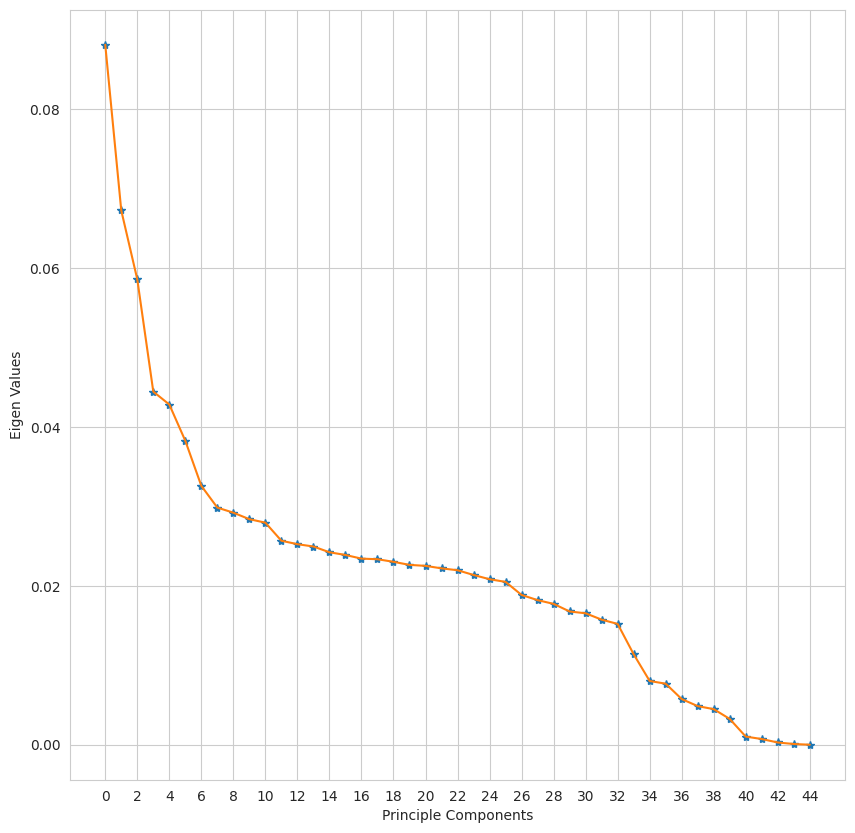

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(pca.explained_variance_ratio_,'*')
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(0,45,2))
plt.xlabel('Principle Components')
plt.ylabel('Eigen Values')
plt.show()

Proportion of variance plot

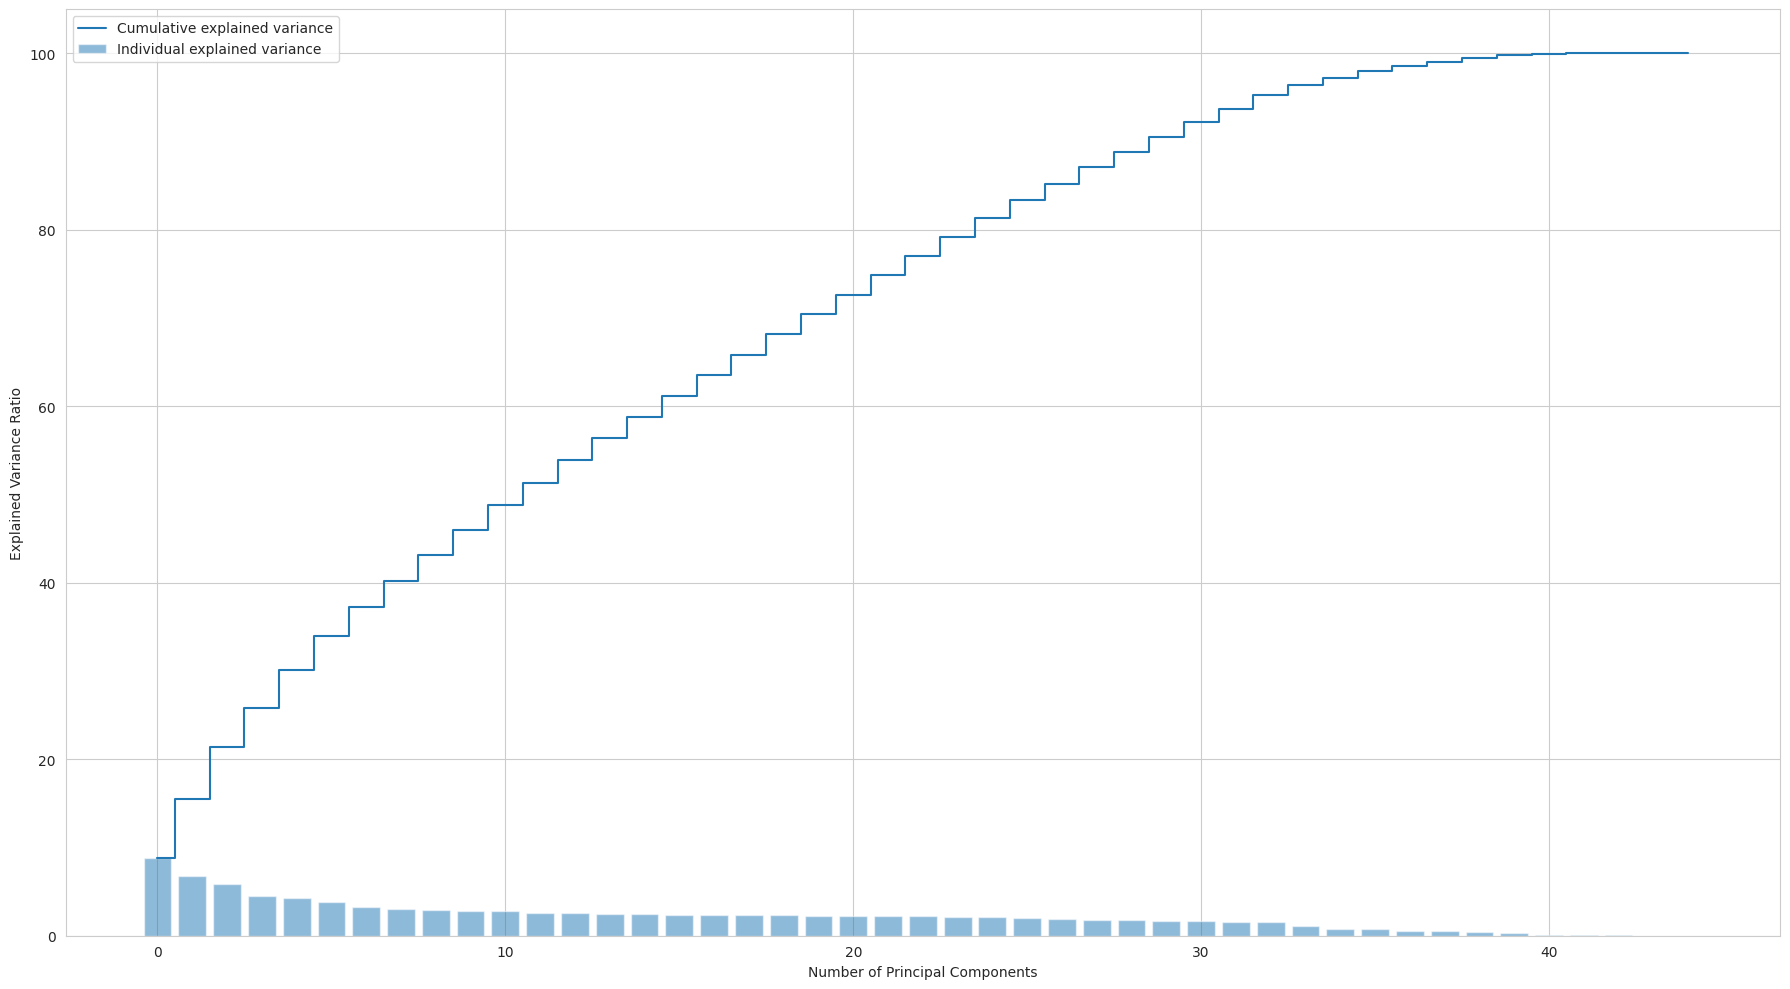

In [ ]:
plt.figure(figsize=(18 , 10))
plt.bar(range(45), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(45), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Observation:

We can observe that over 90% of the variance in the data can be explained by the first 30 Principle Components.

Therefore, we use a heat map to visualize how variables affect each component.

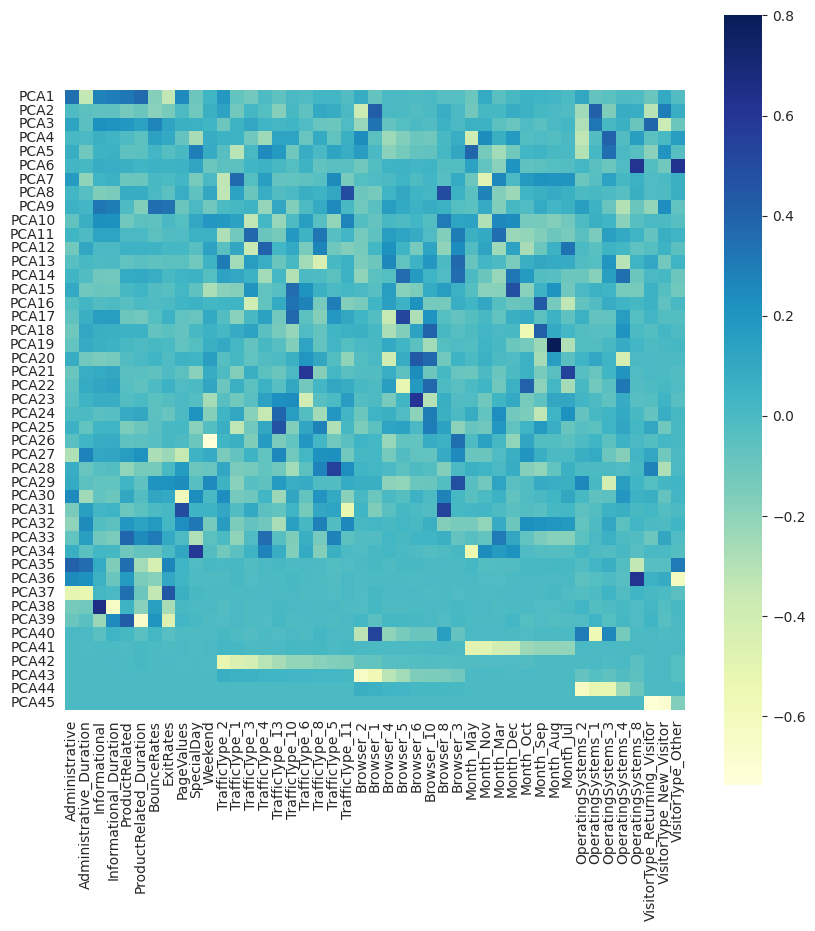

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns))
ax.set_aspect("equal")
plt.savefig('PCA Heatmap.jpeg',bbox_inches='tight',dpi=150)

Observation:

The effects of the features may be seen on each of the Principle components.

Visualize 2D of PCA components

In [ ]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(Xs_pca)

In [ ]:
principalDf = pd.DataFrame(data = X_pca2
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df_final[['Revenue']]], axis = 1)

In [ ]:
X=df_final.drop(columns=['Revenue'],axis=1)

In [ ]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

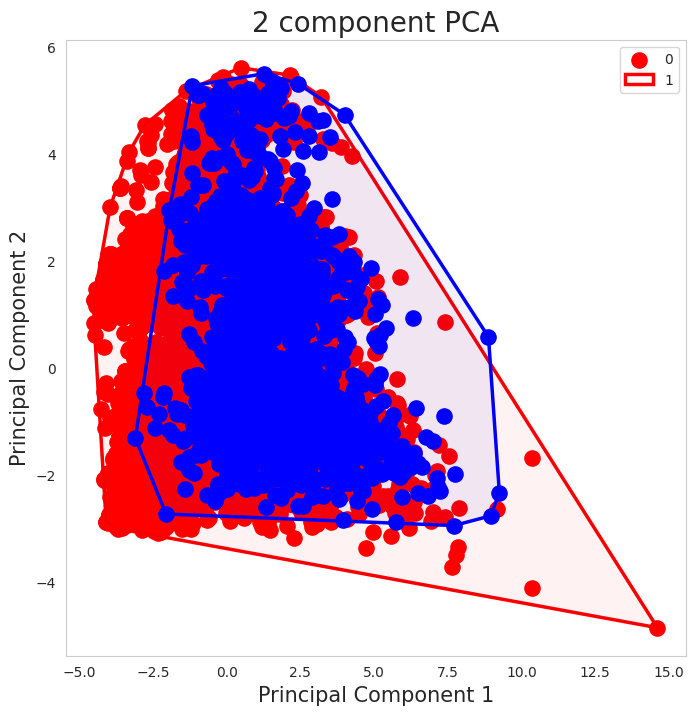

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Revenue'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 120)
    encircle(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , ec = color, fc="none", linewidth=2.5)
    #shading
    encircle(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , ec = 'k', fc=color, alpha=0.05)
ax.legend(targets)
ax.grid()
plt.savefig('PCA cluster.jpeg',bbox_inches='tight',dpi=150)

Visualize 3D of PCA components

<Figure size 1000x500 with 0 Axes>

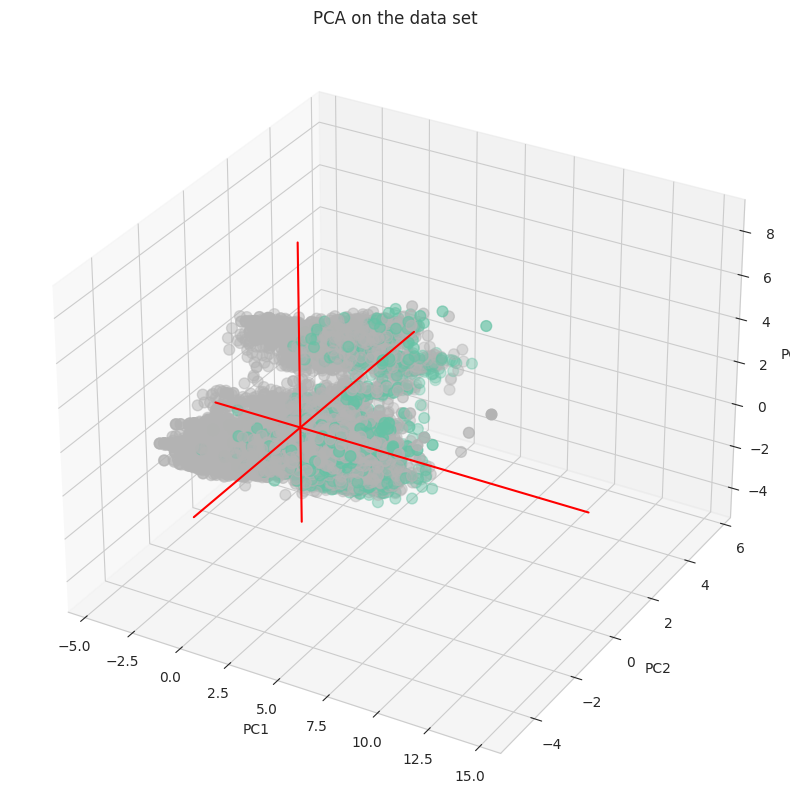

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(Xs_pca)
c=pd.DataFrame({})
c['Revenue']=pd.Categorical(df_final['Revenue'])
my_color=c['Revenue'].astype(np.float)

fig = plt.figure(figsize=(10, 5))

# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(Xs_pca), columns=['PCA%i' % i for i in range(3)], index=df.index)

# Plot initialisation
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the data set")
#plt.show()


Observation:


Even if there is some overlap, the points that fall into the same category are clearly clustered and region-bound.

This proves that the data captured in the first three PCs is informative enough to discriminate the categories from each other.

In other words, we now have proof that the data is not just random but may be utilized to distinguish or explain the target variable.

PCA Bi-Plot

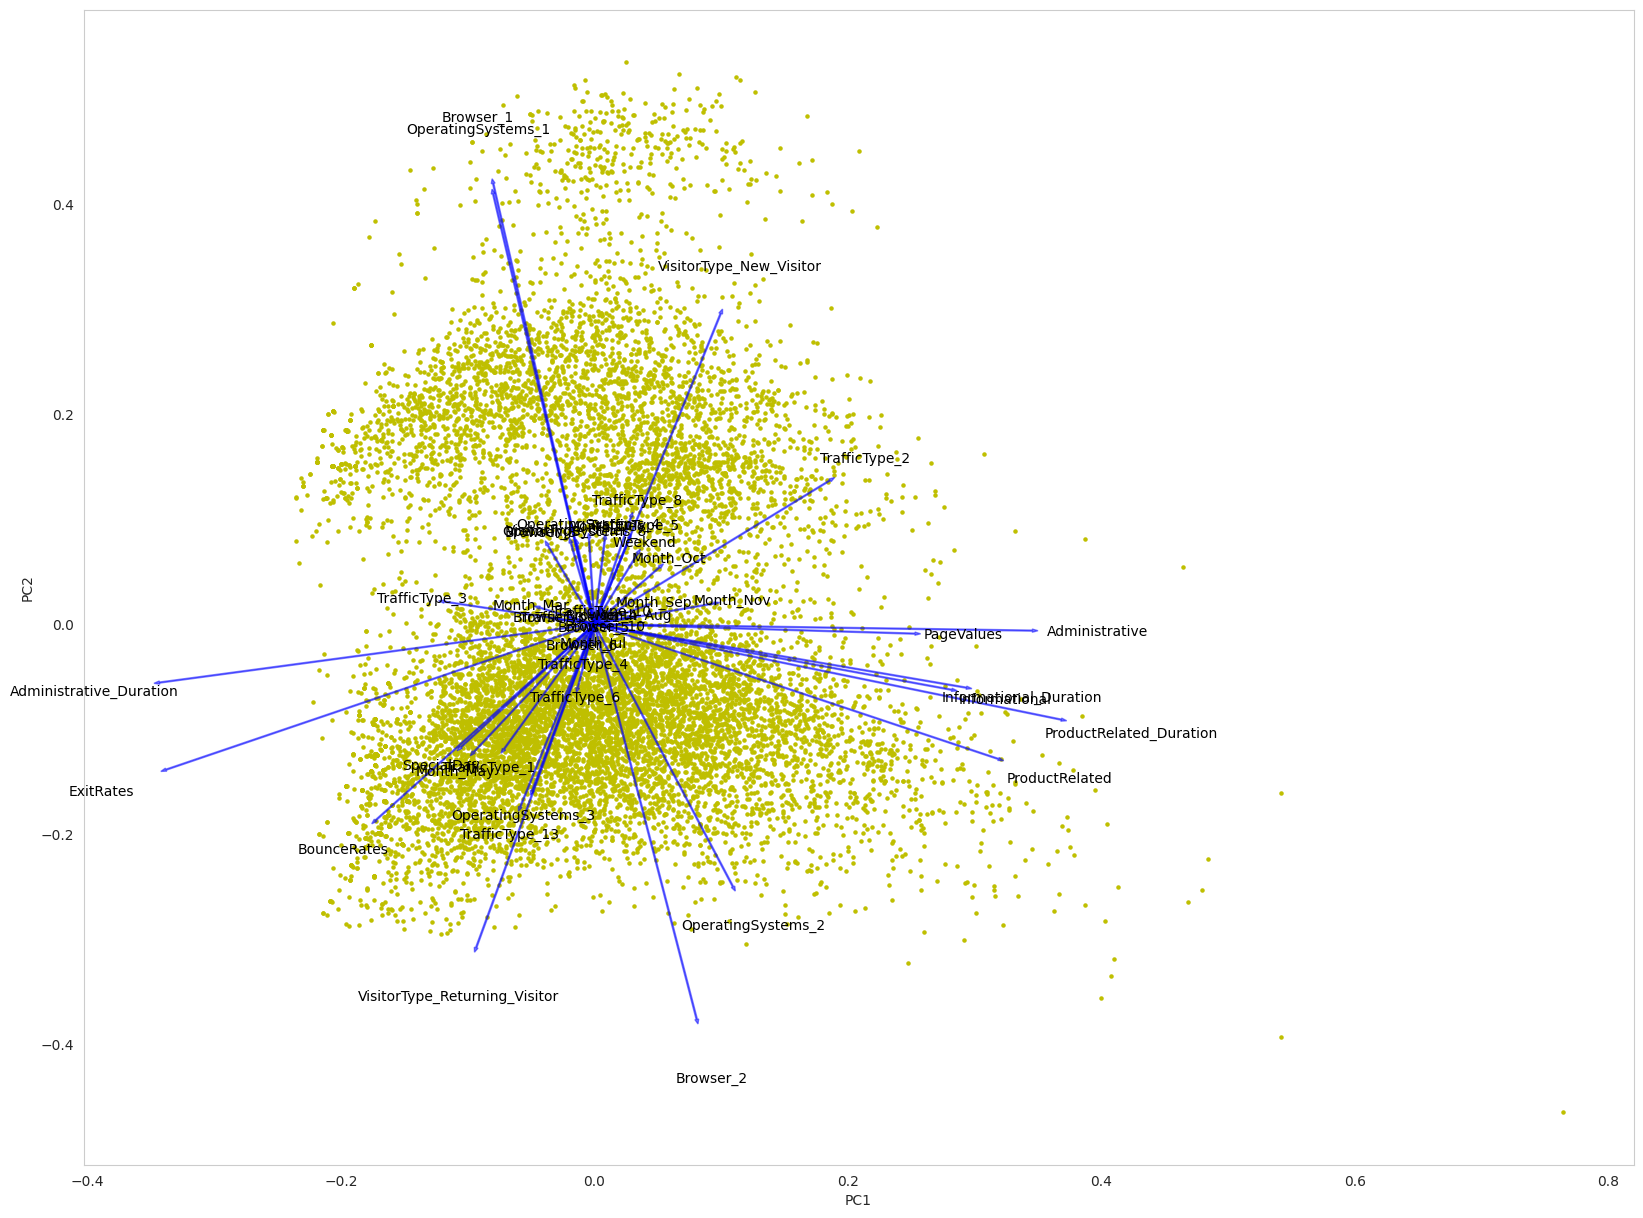

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5,c='y')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'b',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
plt.figure(figsize=(20,15))
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()


Observation:

The PCA biplot allows you to project the observations onto the axes in order to approximate the original values of the variables. The variables are represented by calibrated axes, and the data are shown as points. We can see how attributes are correlated by looking at the angles between the vectors.



*  The two variables that two vectors represent have a positive correlation when they are near together and create a small angle. [Browser2 and OperatingSystem_2]

*   They are not likely to be associated if they intersect at a 90° angle. [Administrative_Duration and Browser1]
* They are negatively correlated when they diverge and produce a significant angle that is nearly 180°. [Browser2 and Browser1]

Compare PCA number of components with logistic regression algorithm for classification

>PC   Accuracy   Variance Error
>1     0.843        (0.000)
>2     0.844        (0.000)
>3     0.844        (0.000)
>4     0.844        (0.000)
>5     0.844        (0.000)
>6     0.844        (0.000)
>7     0.844        (0.000)
>8     0.844        (0.000)
>9     0.843        (0.000)
>10     0.844        (0.000)
>11     0.844        (0.000)
>12     0.844        (0.000)
>13     0.844        (0.000)
>14     0.844        (0.000)
>15     0.844        (0.000)
>16     0.844        (0.000)
>17     0.843        (0.000)
>18     0.861        (0.000)
>19     0.894        (0.000)
>20     0.893        (0.000)
>21     0.893        (0.000)
>22     0.894        (0.000)
>23     0.896        (0.000)
>24     0.896        (0.000)
>25     0.896        (0.000)
>26     0.896        (0.000)
>27     0.896        (0.000)
>28     0.896        (0.000)
>29     0.896        (0.000)
>30     0.896        (0.000)
>31     0.896        (0.000)
>32     0.896        (0.000)
>33     0.896        (0.000)
>34     0.896       

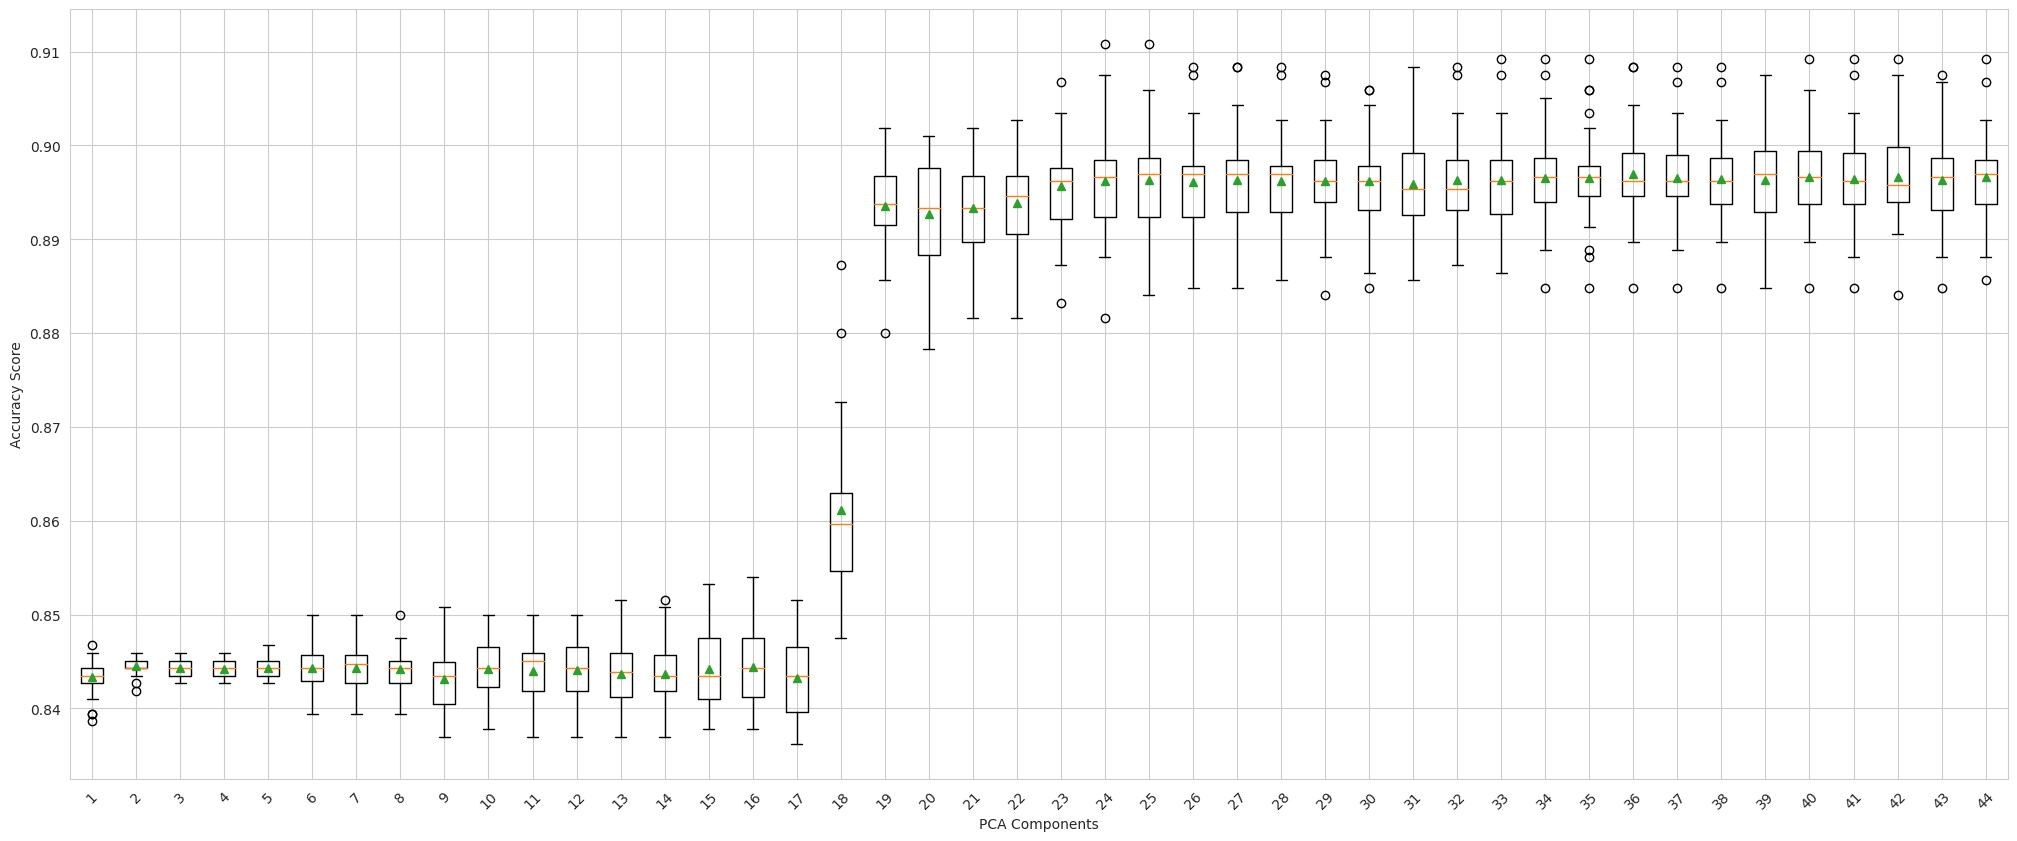

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as  plt



# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,45):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
print('>PC   Accuracy   Variance Error')
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s     %.3f        (%.3f)' % (name, mean(scores), np.var(scores)))
# plot model performance for comparison
plt.figure(figsize=(25,10))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.xlabel('PCA Components')
plt.ylabel('Accuracy Score')
plt.show()


Observation:

As the number of dimensions increases, we notice a general trend of improved performance. The results for this dataset imply a trade-off between the number of dimensions and the model's classification accuracy.

We do not perceive any improvement after 15 components. This corresponds to our characterization of the problem, in which only the first 15 components convey information about the class and the rest components are redundant.

Building Model Using PCA components which explain 95% variance of the data

In [ ]:
X=df_final.drop(columns=['Revenue'],axis=1)
y=df_final['Revenue']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs_pca=ss.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(Xs_pca)

In [ ]:
X_pca.shape

(12330, 33)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_pca=DecisionTreeClassifier(criterion='entropy',random_state=0)

from sklearn.linear_model import LogisticRegression
LR_pca=LogisticRegression()

from sklearn.naive_bayes import GaussianNB
nb_pca=GaussianNB()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc_pca=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn_pca=KNeighborsClassifier()

from sklearn.ensemble import AdaBoostClassifier
ada_pca=AdaBoostClassifier(random_state=0)


from xgboost import XGBClassifier
xgb_pca=XGBClassifier(random_state=0)

from sklearn import svm
svc_pca=svm.SVC(random_state=0)

Building Model Using PCA components - Hyperparameter Tuning of Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

pca_rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,100),
        'max_features':sp_randint(1,33),
        'max_depth': sp_randint(2,10),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20),
        'criterion':['gini','entropy']}

rsearch_rfc_pca=RandomizedSearchCV(pca_rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc_pca.fit(X_pca,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3575e850d0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3575e83880>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f357d0adf40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3576809160>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f357672a2b0>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_rfc_pca.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 25,
 'min_samples_leaf': 18,
 'min_samples_split': 7,
 'n_estimators': 26}

In [ ]:
pca_rfc_tunned=RandomForestClassifier(**rsearch_rfc_pca.best_params_,random_state=0)

Building Model Using PCA components - Hyperparameter Tuning of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

pca_knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,50),'p':sp_randint(1,5)}

rsearch_knn_pca=RandomizedSearchCV(pca_knn_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn_pca.fit(X_pca,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3575e83d00>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3574098ac0>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_knn_pca.best_params_

{'n_neighbors': 45, 'p': 4}

In [ ]:
pca_knn_tunned=KNeighborsClassifier(**rsearch_knn_pca.best_params_)

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform



Building Model Using PCA Components - Hyperparameter Tuning of XGBoost

In [ ]:
XGB_tunned_pca=XGBClassifier(random_state=0)
params = {
        'min_child_weight': sp_randint(1,20),
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': sp_randint(2,10)
        }

rsearch_xgb_pca=RandomizedSearchCV(XGB_tunned_pca,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_xgb_pca.fit(X_pca,y)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=0, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3574086fd0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3574045250>,
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0)

In [ ]:
rsearch_xgb_pca.best_params_

{'colsample_bytree': 1.0,
 'gamma': 5,
 'max_depth': 2,
 'min_child_weight': 3,
 'subsample': 1.0}

In [ ]:
XGB_tunned_pca=XGBClassifier(**rsearch_xgb_pca.best_params_,random_state=0)

Building Model Using PCA Components - Hyperparameter Tuning of SVC

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn import svm
SVM_tunned_pca=svm.SVC(random_state=0)
params = {'C': [0.1, 1, 10, 100, 1000],
          'degree': sp_randint(0,20),
          'gamma': sp_uniform(0.1,0.5),
          'kernel': ['rbf']}

rsearch_svm_pca=RandomizedSearchCV(SVM_tunned_pca,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_svm_pca.fit(X_pca,y)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=0), n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f357bf46eb0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f35740867c0>,
                                        'kernel': ['rbf']},
                   random_state=0)

In [ ]:
rsearch_svm_pca.best_params_

{'C': 0.1, 'degree': 13, 'gamma': 0.10234773809627354, 'kernel': 'rbf'}

In [ ]:
SVM_tunned_pca=svm.SVC(**rsearch_svm_pca.best_params_,random_state=0)

Stacking

In [ ]:
from sklearn.ensemble import VotingClassifier

soft_voting_pca=VotingClassifier(estimators=[('Logistic',LR_pca),('Random Forest Tunned',pca_rfc_tunned),('XG Boost Tuned',XGB_tunned_pca)],voting='soft')

weighted_soft_pca=VotingClassifier(estimators=[('Logistic',LR_pca),('Random Forest Tunned',pca_rfc_tunned),('XG Boost Tuned',XGB_tunned_pca)],weights=[3,1,2],voting='soft')

In [ ]:
models_pca=[]
models_pca.append(('Logistic',LR_pca))
models_pca.append(('Decision Tree',dt_pca))
models_pca.append(('Naive Bayes',nb_pca))
models_pca.append(('Random Forest',rfc_pca))
models_pca.append(('Random Forest Tuned',pca_rfc_tunned))
models_pca.append(('KNN',knn_pca))
models_pca.append(('KNN Tuned',pca_knn_tunned))
models_pca.append(('Ada-Boost',ada_pca))
models_pca.append(('Soft Voting',soft_voting_pca))
models_pca.append(('Weighted Soft Voting',weighted_soft_pca))
models_pca.append(('XG Boost',xgb_pca))
models_pca.append(('XG Boost Tuned',XGB_tunned_pca))
models_pca.append(('SVM',svc_pca))
models_pca.append(('SVM Tuned',SVM_tunned_pca))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split

results_pca=[]
acc_score_pca=[]
auc_score_pca=[]
bias_pca=[]
f1_score_pca=[]
precision_score_pca=[]
recall_score_pca=[]
names_pca=[]
for name,model in models_pca:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='roc_auc')
    results_pca.append(cv_results)
    bias_pca.append(np.var(cv_results,ddof=1))
    auc_score_pca.append(np.mean(cv_results))
    f1=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='f1_weighted')
    f1_score_pca.append(np.mean(f1))

    acc=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='accuracy')
    acc_score_pca.append(np.mean(acc))

    p=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='precision_weighted')
    precision_score_pca.append(np.mean(p))

    r=model_selection.cross_val_score(model,X_pca,y,cv=kfold,scoring='recall_weighted')
    recall_score_pca.append(np.mean(r))

    names_pca.append(name)

result_pca_df=pd.DataFrame({'Model':names_pca,
                           'Accuracy Score':acc_score_pca,
                            'ROC-AUC Score':auc_score_pca,
                            'Variance Error':bias_pca,
                            'F1 Score':f1_score_pca,
                            'Precision Score':precision_score_pca,
                            'Recall Score':recall_score_pca})

Model Results of PCA components

In [ ]:
result_pca_df

Model  Accuracy Score  ROC-AUC Score  Variance Error  \
0               Logistic        0.893998       0.911392        0.000085   
1          Decision Tree        0.857421       0.732587        0.000471   
2            Naive Bayes        0.861800       0.877820        0.000130   
3          Random Forest        0.891971       0.913437        0.000062   
4    Random Forest Tuned        0.891646       0.918008        0.000049   
5                    KNN        0.870803       0.834080        0.000145   
6              KNN Tuned        0.856610       0.878290        0.000070   
7              Ada-Boost        0.887105       0.905667        0.000084   
8            Soft Voting        0.896756       0.921585        0.000047   
9   Weighted Soft Voting        0.896918       0.920410        0.000051   
10              XG Boost        0.891890       0.912381        0.000045   
11        XG Boost Tuned        0.895296       0.915755        0.000042   
12                   SVM        0.898459       0.902050        0.000236   
13             SVM Tuned        0.855312       0.870054        0.000171   

    F1 Score  Precision Score  Recall Score  
0   0.890850         0.889201      0.893998  
1   0.857963         0.858914      0.857421  
2   0.861877         0.862281      0.861800  
3   0.883386         0.883033      0.891971  
4   0.885014         0.883366      0.891646  
5   0.857626         0.855375      0.870803  
6   0.813318         0.836228      0.856610  
7   0.881770         0.879561      0.887105  
8   0.892391         0.890739      0.896756  
9   0.893108         0.891497      0.896918  
10  0.887052         0.885162      0.891890  
11  0.891147         0.889364      0.895296  
12  0.894921         0.893543      0.898459  
13  0.804960         0.843760      0.855312


As a model results, The Random Forest Tuned has higher score of ROC-AUC, Precision and Recall.

Model Comparison

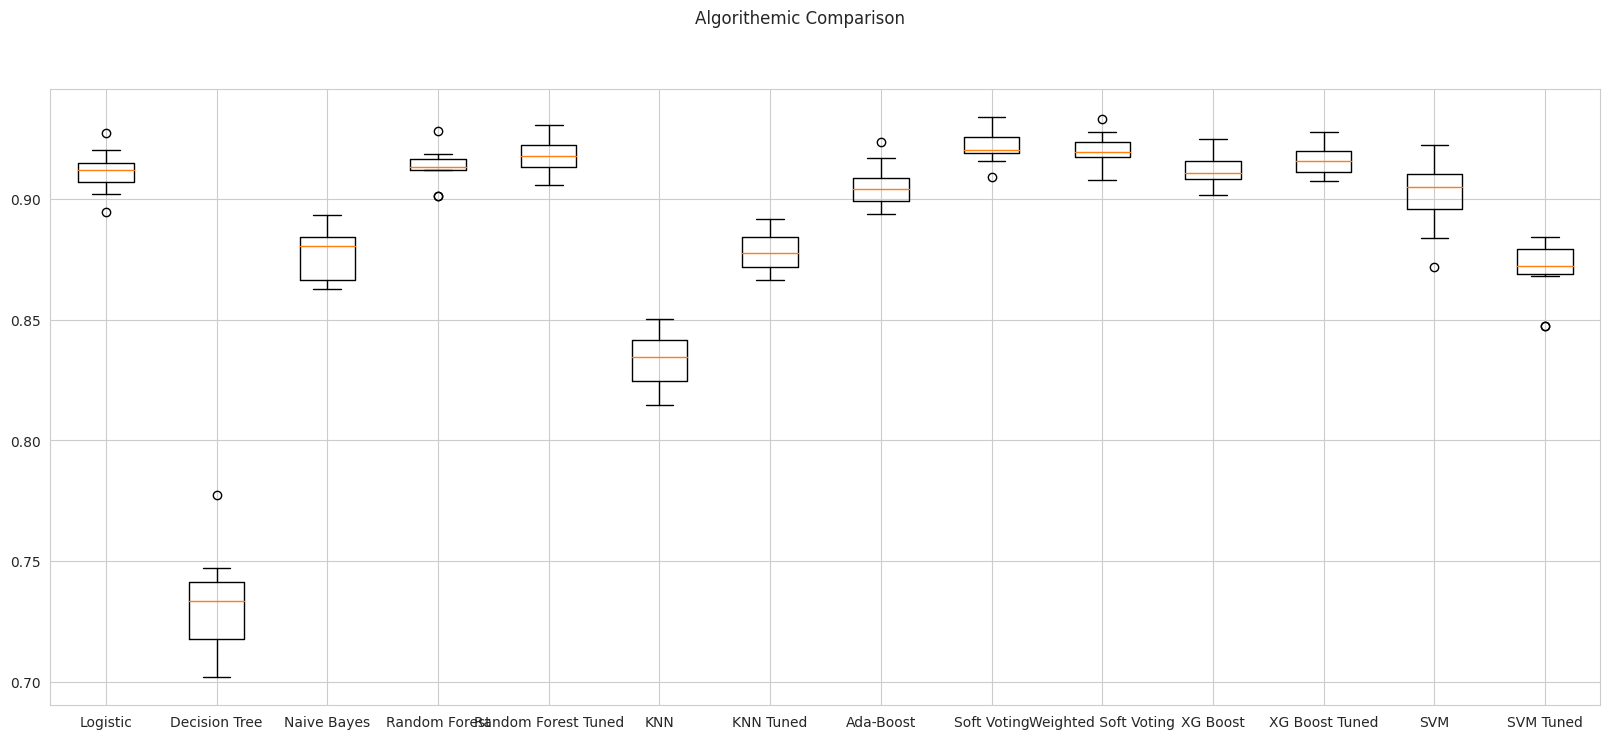

In [ ]:
fig=plt.figure(figsize=(20,8))
fig.suptitle('Algorithemic Comparison')
ax=fig.add_subplot(111)

plt.boxplot(results_pca)
ax.set_xticklabels(names_pca)
plt.show()

#Modeling without PCA

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tools import add_constant
df_constant = add_constant(df_final)
df_constant.head()

const  Administrative  Administrative_Duration  Informational  \
0    1.0               0                      1.0              0   
1    1.0               0                      1.0              0   
2    1.0               0                      1.0              0   
3    1.0               0                      1.0              0   
4    1.0               0                      1.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                 6.990788   
2                     0.0               1                 0.000000   
3                     0.0               2                 1.513204   
4                     0.0              10                14.727490   

   BounceRates  ExitRates  PageValues  SpecialDay  Weekend  Revenue  \
0     0.724780   0.724780         0.0         0.0        0        0   
1     0.000000   0.630957         0.0         0.0        0        0   
2     0.724780   0.724780         0.0         0.0        0        0   
3     0.549280   0.674879         0.0         0.0        0        0   
4     0.457305   0.549280         0.0         0.0        1        0   

   TrafficType_2  TrafficType_1  TrafficType_3  TrafficType_4  TrafficType_13  \
0              0              1              0              0               0   
1              1              0              0              0               0   
2              0              0              1              0               0   
3              0              0              0              1               0   
4              0              0              0              1               0   

   TrafficType_10  TrafficType_6  TrafficType_8  TrafficType_5  \
0               0              0              0              0   
1               0              0              0              0   
2               0              0              0              0   
3               0              0              0              0   
4               0              0              0              0   

   TrafficType_11  Browser_2  Browser_1  Browser_4  Browser_5  Browser_6  \
0               0          0          1          0          0          0   
1               0          1          0          0          0          0   
2               0          0          1          0          0          0   
3               0          1          0          0          0          0   
4               0          0          0          0          0          0   

   Browser_10  Browser_8  Browser_3  Month_May  Month_Nov  Month_Mar  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          1          0          0          0   

   Month_Dec  Month_Oct  Month_Sep  Month_Aug  Month_Jul  OperatingSystems_2  \
0          0          0          0          0          0                   0   
1          0          0          0          0          0                   1   
2          0          0          0          0          0                   0   
3          0          0          0          0          0                   0   
4          0          0          0          0          0                   0   

   OperatingSystems_1  OperatingSystems_3  OperatingSystems_4  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   0                   0                   1   
3                   0                   1                   0   
4                   0                   1                   0   

   OperatingSystems_8  VisitorType_Returning_Visitor  VisitorType_New_Visitor  \
0                  

In [ ]:
X=df_final.drop(columns=['Revenue','ExitRates'],axis=1)
y=df_final['Revenue']
X=X.astype(float)

Xc=sm.add_constant(X)

In [ ]:
model = sm.Logit(y,Xc)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.245505
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12286
Method:                           MLE   Df Model:                           43
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                  0.4302
Time:                        18:28:09   Log-Likelihood:                -3027.1
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.7208        nan        nan        nan         nan         nan
Administrative                   -0.0833      0.012     -6.774      0.000      -0.107      -0.059
Administrative_Duration           0.0115      0.097      0.119      0.905      -0.178       0.201
Informational                    -0.0001      0.034     -0.004      0.997      -0.066       0.066
Informational_Duration           -0.0382      0.131     -0.293      0.770      -0.294       0.218
ProductRelated                    0.0016      0.001      1.669      0.095      -0.000       0.004
ProductRelated_Duration           0.0154      0.009      1.684      0.092      -0.003       0.033
BounceRates                      -1.3916      0.185     -7.522      0.000      -1.754      -1.029
PageValues                        5.7497      0.126     45.485      0.000       5.502       5.997
SpecialDay                       -0.2653      0.250     -1.063      0.288      -0.754       0.224
Weekend                           0.0624      0.078      0.799      0.425      -0.091       0.215
TrafficType_2                    -0.1198      0.212     -0.564      0.573      -0.536       0.296
TrafficType_1                    -0.5304      0.223     -2.382      0.017      -0.967      -0.094
TrafficType_3                    -0.4867      0.229     -2.123      0.034      -0.936      -0.037
TrafficType_4                    -0.2419      0.238     -1.016      0.310      -0.709       0.225
TrafficType_13                   -0.8571      0.281     -3.048      0.002      -1.408      -0.306
TrafficType_10                    0.0357      0.264      0.135      0.892      -0.481       0.553
TrafficType_6                    -0.4316      0.279     -1.549      0.121      -0.978       0.115
TrafficType_8                     0.3692      0.271      1.362      0.173      -0.162       0.900
TrafficType_5                     0.0959      0.300      0.319      0.749      -0.492       0.684
TrafficType_11                    0.1160      0.304      0.381      0.703      -0.480       0.712
Browser_2                        -0.3056      0.388     -0.787      0.431      -1.067       0.456
Browser_1                        -0.2356      0.426     -0.553      0.580      -1.071       0.600
Browser_4                        -0.3364      0.410     -0.821      0.411      -1.139       0.466
Browser_5                        -0.0853      0.421     -0.203      0.839      -0.911       0.740
Browser_6                        -0.9778      0.490     -1.996      0.046      -1.938      -0.018
Browser_10                       -0.0215      0.471     -0.046      0.964      -0.945       0.902
Browser_8                         0.0944      0.543      0.174      0.862      -0.971       1.160
Browser_3                        -0.9080      0.642     -1.415      0.157      -2.166       0.350
Month_May                        -0.1603      0.238     -0.673      0.501      -0.628       0.307
Month_N

#FEATURE SELECTION

BACKWARD ELIMINATION

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'PageValues', 'TrafficType_1', 'TrafficType_3', 'TrafficType_13', 'TrafficType_6', 'TrafficType_8', 'Browser_6', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Month_Aug', 'Month_Jul', 'VisitorType_New_Visitor']


In [ ]:
len(selected_features_BE)

18

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12286
Method:                           MLE   Df Model:                           43
Date:                Fri, 21 Apr 2023   Pseudo R-squ.:                  0.4302
Time:                        18:28:43   Log-Likelihood:                -3027.1
converged:                       True   LL-Null:                       -5312.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.7208        nan        nan        nan         nan         nan
Administrative                   -0.0833      0.012     -6.774      0.000      -0.107      -0.059
Administrative_Duration           0.0115      0.097      0.119      0.905      -0.178       0.201
Informational                    -0.0001      0.034     -0.004      0.997      -0.066       0.066
Informational_Duration           -0.0382      0.131     -0.293      0.770      -0.294       0.218
ProductRelated                    0.0016      0.001      1.669      0.095      -0.000       0.004
ProductRelated_Duration           0.0154      0.009      1.684      0.092      -0.003       0.033
BounceRates                      -1.3916      0.185     -7.522      0.000      -1.754      -1.029
PageValues                        5.7497      0.126     45.485      0.000       5.502       5.997
SpecialDay                       -0.2653      0.250     -1.063      0.288      -0.754       0.224
Weekend                           0.0624      0.078      0.799      0.425      -0.091       0.215
TrafficType_2                    -0.1198      0.212     -0.564      0.573      -0.536       0.296
TrafficType_1                    -0.5304      0.223     -2.382      0.017      -0.967      -0.094
TrafficType_3                    -0.4867      0.229     -2.123      0.034      -0.936      -0.037
TrafficType_4                    -0.2419      0.238     -1.016      0.310      -0.709       0.225
TrafficType_13                   -0.8571      0.281     -3.048      0.002      -1.408      -0.306
TrafficType_10                    0.0357      0.264      0.135      0.892      -0.481       0.553
TrafficType_6                    -0.4316      0.279     -1.549      0.121      -0.978       0.115
TrafficType_8                     0.3692      0.271      1.362      0.173      -0.162       0.900
TrafficType_5                     0.0959      0.300      0.319      0.749      -0.492       0.684
TrafficType_11                    0.1160      0.304      0.381      0.703      -0.480       0.712
Browser_2                        -0.3056      0.388     -0.787      0.431      -1.067       0.456
Browser_1                        -0.2356      0.426     -0.553      0.580      -1.071       0.600
Browser_4                        -0.3364      0.410     -0.821      0.411      -1.139       0.466
Browser_5                        -0.0853      0.421     -0.203      0.839      -0.911       0.740
Browser_6                        -0.9778      0.490     -1.996      0.046      -1.938      -0.018
Browser_10                       -0.0215      0.471     -0.046      0.964      -0.945       0.902
Browser_8                         0.0944      0.543      0.174      0.862      -0.971       1.160
Browser_3                        -0.9080      0.642     -1.415      0.157      -2.166       0.350
Month_May                        -0.1603      0.238     -0.673      0.501      -0.628       0.307
Month_N

#Model Using selected Features

In [ ]:
X=df_final[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'PageValues', 'TrafficType_1',
            'TrafficType_3', 'TrafficType_13', 'TrafficType_6', 'TrafficType_8', 'Browser_6', 'Month_May', 'Month_Nov',
            'Month_Oct', 'Month_Sep', 'Month_Aug', 'Month_Jul', 'VisitorType_New_Visitor']]
X.head()

Administrative  Informational  ProductRelated  BounceRates  PageValues  \
0               0              0               1     0.724780         0.0   
1               0              0               2     0.000000         0.0   
2               0              0               1     0.724780         0.0   
3               0              0               2     0.549280         0.0   
4               0              0              10     0.457305         0.0   

   TrafficType_1  TrafficType_3  TrafficType_13  TrafficType_6  TrafficType_8  \
0              1              0               0              0              0   
1              0              0               0              0              0   
2              0              1               0              0              0   
3              0              0               0              0              0   
4              0              0               0              0              0   

   Browser_6  Month_May  Month_Nov  Month_Oct  Month_Sep  Month_Aug  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Month_Jul  VisitorType_New_Visitor  
0          0                        0  
1          0                        0  
2          0                        0  
3          0                        0  
4          0                        0

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,log_loss,f1_score

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(X)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
ada=AdaBoostClassifier(random_state=0)
gb=GradientBoostingClassifier(random_state=0)
bc=BaggingClassifier(random_state=0)

from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0)

from sklearn import svm
svc=svm.SVC(random_state=0)

Model using selected features - Hyperparameter Tuning of Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,200),
        'max_features':sp_randint(1,18),
        'max_depth': sp_randint(2,20),
        'min_samples_split':sp_randint(2,40),
        'min_samples_leaf':sp_randint(1,30),
        'criterion':['gini','entropy']}

rsearch_rfc=RandomizedSearchCV(rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f572c2f8130>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f572c3932b0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f572c2f8370>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f572c3a4730>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f572c369fa0>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'max_features': 6,
 'min_samples_leaf': 26,
 'min_samples_split': 15,
 'n_estimators': 73}

In [ ]:
rfc_tunned=RandomForestClassifier(**rsearch_rfc.best_params_,random_state=0)

Model using selected features - Hyperparameter Tuning of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,40),'p':sp_randint(1,10)}

rsearch_knn=RandomizedSearchCV(knn_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f572c205850>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f572c266a90>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_knn.best_params_

{'n_neighbors': 39, 'p': 8}

In [ ]:
knn_tunned=KNeighborsClassifier(**rsearch_knn.best_params_)

Model using selected features - Hyperparameter Tuning of XGBoost

In [ ]:
XGB_tunned=XGBClassifier(random_state=0)
params = {
        'min_child_weight': sp_randint(2,10),
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': sp_randint(2,10)
        }

rsearch_xgb=RandomizedSearchCV(XGB_tunned,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_xgb.fit(Xs,y)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=0, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f572731e9a0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5727314ac0>,
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0)

In [ ]:
rsearch_xgb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 2,
 'max_depth': 2,
 'min_child_weight': 5,
 'subsample': 1.0}

In [ ]:
XGB_tunned=XGBClassifier(**rsearch_xgb.best_params_,random_state=0)

Model using selected features - Hyperparameter Tuning of SVC

In [ ]:
from sklearn import svm
SVM_tunned=svm.SVC(random_state=0)
params = {'C': [0.1, 1, 10, 100, 1000],
          'degree': sp_randint(1,15),
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf']}

rsearch_svm=RandomizedSearchCV(SVM_tunned,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_svm.fit(Xs,y)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=0), n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f57273143a0>,
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=0)

In [ ]:
rsearch_svm.best_params_

{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
SVM_tunned=svm.SVC(**rsearch_svm.best_params_,random_state=0)

Stacking

In [ ]:
from sklearn.ensemble import VotingClassifier

soft_voting=VotingClassifier(estimators=[('Logistic',LR),('Random Forest Tunned',rfc_tunned),('XG Boost Tuned',XGB_tunned)],voting='soft')

weighted_soft=VotingClassifier(estimators=[('Logistic',LR),('Random Forest Tunned',rfc_tunned),('XG Boost Tuned',XGB_tunned)],weights=[3,1,2],voting='soft')

In [ ]:
models_a=[]
models_a.append(('Logistic',LR))
models_a.append(('Decision Tree',dt))
models_a.append(('Naive Bayes',nb))
models_a.append(('Random Forest',rfc))
models_a.append(('Random Forest Tuned',rfc_tunned))
models_a.append(('KNN',knn))
models_a.append(('KNN Tuned',knn_tunned))
models_a.append(('Bagging',bc))
models_a.append(('Ada-Boost',ada))
models_a.append(('Gradient Boost',gb))
models_a.append(('Soft Voting',soft_voting))
models_a.append(('Weighted Soft Voting',weighted_soft))
models_a.append(('XG Boost',xgb))
models_a.append(('XG Boost Tuned',XGB_tunned))
models_a.append(('SVM',svc))
models_a.append(('SVM Tuned',SVM_tunned))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split

results_a=[]
acc_score_a=[]
auc_score_a=[]
bias_a=[]
f1_score_a=[]
precision_score_a=[]
recall_score_a=[]
names_a=[]
for name,model in models_a:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='roc_auc')
    results_a.append(cv_results)
    bias_a.append(np.var(cv_results,ddof=1))
    auc_score_a.append(np.mean(cv_results))

    f1=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='f1_weighted')
    f1_score_a.append(np.mean(f1))

    acc=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='accuracy')
    acc_score_a.append(np.mean(acc))

    p=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='precision_weighted')
    precision_score_a.append(np.mean(p))

    r=model_selection.cross_val_score(model,Xs,y,cv=kfold,scoring='recall_weighted')
    recall_score_a.append(np.mean(r))

    names_a.append(name)

result_df=pd.DataFrame({'Model':names_a,
                        'Accuracy Score':acc_score_a,
                        'ROC-AUC Score':auc_score_a,
                        'Variance Error':bias_a,
                        'F1 Score':f1_score_a,
                        'Precision Score':precision_score_a,
                        'Recall Score':recall_score_a})

Model Results

In [ ]:
result_df

Model  Accuracy Score  ROC-AUC Score  Variance Error  \
0               Logistic        0.898135       0.914117        0.000088   
1          Decision Tree        0.865207       0.743601        0.000494   
2            Naive Bayes        0.831955       0.849016        0.000146   
3          Random Forest        0.894161       0.914730        0.000060   
4    Random Forest Tuned        0.904380       0.932590        0.000029   
5                    KNN        0.886375       0.873696        0.000113   
6              KNN Tuned        0.890916       0.915682        0.000062   
7                Bagging        0.884185       0.886422        0.000098   
8              Ada-Boost        0.891646       0.917153        0.000045   
9         Gradient Boost        0.899919       0.930496        0.000049   
10           Soft Voting        0.902595       0.931265        0.000031   
11  Weighted Soft Voting        0.902028       0.928899        0.000036   
12              XG Boost        0.894972       0.923656        0.000035   
13        XG Boost Tuned        0.901865       0.930032        0.000035   
14                   SVM        0.900487       0.896406        0.000265   
15             SVM Tuned        0.894728       0.899892        0.000209   

    F1 Score  Precision Score  Recall Score  
0   0.895310         0.893921      0.898135  
1   0.865421         0.865911      0.865207  
2   0.845702         0.872921      0.831955  
3   0.890055         0.888262      0.894161  
4   0.900687         0.899430      0.904380  
5   0.882692         0.880752      0.886375  
6   0.882764         0.882024      0.890916  
7   0.879164         0.876871      0.884185  
8   0.887909         0.886174      0.891646  
9   0.896398         0.894996      0.899919  
10  0.899587         0.898276      0.902595  
11  0.899215         0.897868      0.902028  
12  0.891340         0.889655      0.894972  
13  0.898698         0.897385      0.901865  
14  0.896914         0.895536      0.900487  
15  0.886634         0.886344      0.894728

The Random Forest Tuned model is the best effective model as well.

Comparion Model using selected features

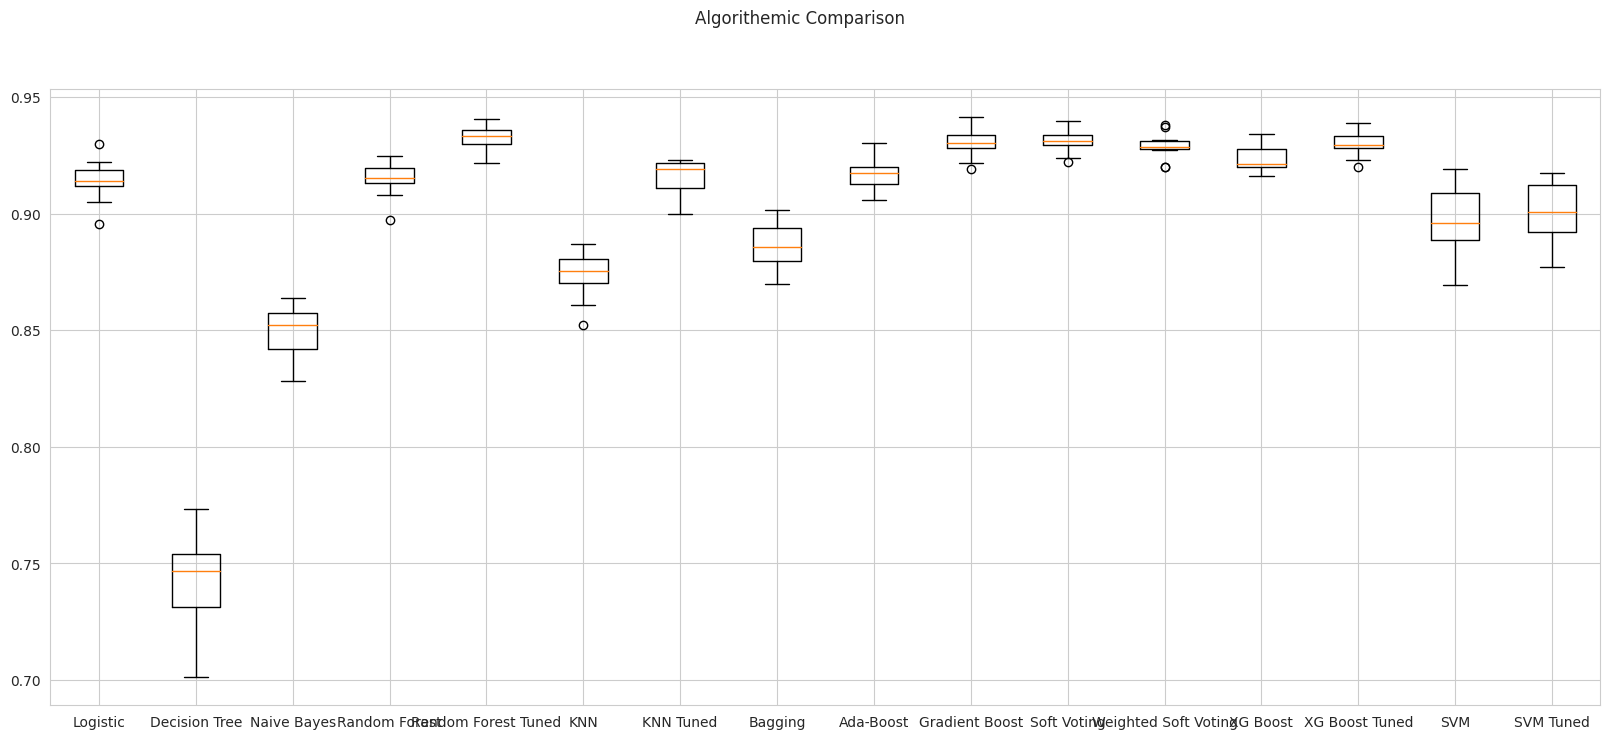

In [ ]:
fig=plt.figure(figsize=(20,8))
fig.suptitle('Algorithemic Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results_a)
ax.set_xticklabels(names_a)
plt.show()

#Managing Class Imbalance
1) Class Re-weight

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [ ]:
X=df_final[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'PageValues', 'TrafficType_1',
            'TrafficType_3', 'TrafficType_13', 'TrafficType_6', 'TrafficType_8', 'Browser_6', 'Month_May', 'Month_Nov',
            'Month_Oct', 'Month_Sep', 'Month_Aug', 'Month_Jul', 'VisitorType_New_Visitor']]
X.head()

Administrative  Informational  ProductRelated  BounceRates  PageValues  \
0               0              0               1     0.724780         0.0   
1               0              0               2     0.000000         0.0   
2               0              0               1     0.724780         0.0   
3               0              0               2     0.549280         0.0   
4               0              0              10     0.457305         0.0   

   TrafficType_1  TrafficType_3  TrafficType_13  TrafficType_6  TrafficType_8  \
0              1              0               0              0              0   
1              0              0               0              0              0   
2              0              1               0              0              0   
3              0              0               0              0              0   
4              0              0               0              0              0   

   Browser_6  Month_May  Month_Nov  Month_Oct  Month_Sep  Month_Aug  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Month_Jul  VisitorType_New_Visitor  
0          0                        0  
1          0                        0  
2          0                        0  
3          0                        0  
4          0                        0

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cw, X_test_cw, y_train_cw, y_test_cw = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
print(X_train_cw.shape,X_test_cw.shape)

(8631, 18) (3699, 18)


In [ ]:
lr_cw = LogisticRegression(class_weight='balanced')
scores = cross_validate(lr_cw,
                        X_train_cw, y_train_cw, cv=10, scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9142455013614136, 0.656638439255938)

In [ ]:
rf_cw = RandomForestClassifier(n_estimators=100, class_weight='balanced')
scores = cross_validate(rf_cw,
                        X_train_cw, y_train_cw, cv=10, scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9124792577741824, 0.6935882236229798)

In [ ]:
lr_cw.fit(X_train_cw, y_train_cw)
rf_cw.fit(X_train_cw, y_train_cw)

RandomForestClassifier(class_weight='balanced')

Model After Class Re-Weight

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_cw=DecisionTreeClassifier(criterion='entropy',random_state=0)

from sklearn.linear_model import LogisticRegression
LR_cw=LogisticRegression()

from sklearn.naive_bayes import GaussianNB
nb_cw=GaussianNB()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc_cw=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn_cw=KNeighborsClassifier(n_neighbors=6)

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
ada_cw=AdaBoostClassifier(random_state=0)
gb_cw=GradientBoostingClassifier(random_state=0)
bc_cw=BaggingClassifier(random_state=0)

from xgboost import XGBClassifier
xgb_cw=XGBClassifier(random_state=0)

from sklearn import svm
svc_cw=svm.SVC(random_state=0,probability=True)

Class Re-Weight - Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

cw_rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,1200),
        'max_features':sp_randint(1,18),
        'max_depth': sp_randint(1,60),
        'min_samples_split':sp_randint(2,40),
        'min_samples_leaf':sp_randint(2,20),
        'criterion':['gini','entropy']}

rsearch_rfc_cw=RandomizedSearchCV(cw_rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc_cw.fit(X_train_cw,y_train_cw)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe0155304f0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe0154fdd30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe015530f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe015502820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe01556bb80>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_rfc_cw.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'max_features': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 26,
 'n_estimators': 601}

In [ ]:
cw_rfc_tunned=RandomForestClassifier(**rsearch_rfc_cw.best_params_,random_state=0)

Class Re-Weight - Hyperparameter Tuning for XGBoost

In [ ]:
XGB_tunned_cw=XGBClassifier(random_state=0)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

rsearch_xgb_cw=RandomizedSearchCV(XGB_tunned_cw,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_xgb_cw.fit(X_train_cw,y_train_cw)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=0, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0)

In [ ]:
rsearch_xgb_cw.best_params_

{'subsample': 0.6,
 'min_child_weight': 10,
 'max_depth': 3,
 'gamma': 5,
 'colsample_bytree': 0.8}

In [ ]:
XGB_tunned_cw=XGBClassifier(**rsearch_xgb_cw.best_params_,random_state=0)

Class re-Weight - Hyperparameter Tuning for KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

cw_knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,150),'p':sp_randint(1,70)}

rsearch_knn_cw=RandomizedSearchCV(cw_knn_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn_cw.fit(X_train_cw,y_train_cw)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe015502610>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe012b87130>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_knn_cw.best_params_

{'n_neighbors': 26, 'p': 10}

In [ ]:
cw_knn_tunned=KNeighborsClassifier(**rsearch_knn_cw.best_params_)

Class Re-Weight - Hyperparameter Tuning of SVC

In [ ]:
from sklearn import svm
SVM_tunned_cw=svm.SVC(random_state=0,probability=True)
params = {'C': [0.1, 1, 10, 100, 1000],
          'degree': [0, 1, 2, 3, 4, 5, 6],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf']}

rsearch_svm_cw=RandomizedSearchCV(SVM_tunned_cw,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_svm_cw.fit(X_train_cw,y_train_cw)

RandomizedSearchCV(cv=3, estimator=SVC(probability=True, random_state=0),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [0, 1, 2, 3, 4, 5, 6],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=0)

In [ ]:
rsearch_svm_cw.best_params_

{'kernel': 'rbf', 'gamma': 0.0001, 'degree': 0, 'C': 1000}

In [ ]:
SVM_tunned_cw=svm.SVC(**rsearch_svm_cw.best_params_,random_state=0,probability=True)

In [ ]:
from sklearn.ensemble import VotingClassifier

soft_voting_cw=VotingClassifier(estimators=[('Bagging',bc_cw),('Random Forest Tunned',rfc_cw),('XGB Tuned',XGB_tunned_cw)],voting='soft')

weighted_soft_cw=VotingClassifier(estimators=[('Bagging',bc_cw),('Random Forest Tunned',rfc_cw),('XGB Tuned',XGB_tunned_cw)],weights=[3,1,2],voting='soft')


In [ ]:
models_cw=[]
models_cw.append(('Logistic',LR_cw))
models_cw.append(('Decision Tree',dt_cw))
models_cw.append(('Naive Bayes',nb_cw))
models_cw.append(('Random Forest',rfc_cw))
models_cw.append(('Random Forest Tuned',cw_rfc_tunned))
models_cw.append(('KNN',knn_cw))
models_cw.append(('KNN Tuned',cw_knn_tunned))
models_cw.append(('Bagging',bc_cw))
models_cw.append(('Ada-Boost',ada_cw))
models_cw.append(('Gradient Boost',gb_cw))
models_cw.append(('Soft Voting',soft_voting_cw))
models_cw.append(('Weighted Soft Voting',weighted_soft_cw))
models_cw.append(('XGB',xgb_cw))
models_cw.append(('XGB Tuned',XGB_tunned_cw))
models_cw.append(('SVM',svc_cw))
models_cw.append(('SVM Tuned',SVM_tunned_cw))

In [ ]:
X_train_cm=np.array(X_train_cw)
y_train_cm=np.array(y_train_cw)
X_test=np.array(X_test_cw)
y_test=np.array(y_test_cw)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
acc_train_cw=[]
auc_train_cw=[]

acc_test_cw=[]
auc_test_cw=[]
names_cw=[]
def model_eval(name,algo, Xtrain,ytrain,Xtest,ytest):
    names_cw.append(name)

    algo.fit(Xtrain,ytrain)
    ytrain_pred =algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    acc_train_cw.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_cw.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    acc_test_cw.append(accuracy_score(ytest, ytest_pred))
    auc_test_cw.append(roc_auc_score(ytest, ytest_prob))

In [ ]:
for name,algo in models_cw:
    model_eval(name,algo,X_train_cw,y_train_cw,X_test_cw,y_test_cw)

In [ ]:
result_cw_df=pd.DataFrame({'Model':names_cw,

                           'Accuracy Score Train':acc_train_cw,
                           'ROC-AUC Score Train':auc_train_cw,

                           'Accuracy Score Test':acc_test_cw,
                           'ROC-AUC Score Test':auc_test_cw
                            })

Class Re-Weight Model results

In [ ]:
result_cw_df

Model  Accuracy Score Train  ROC-AUC Score Train  \
0               Logistic              0.898158             0.911946   
1          Decision Tree              0.995366             0.999887   
2            Naive Bayes              0.829452             0.848538   
3          Random Forest              0.995366             0.999575   
4    Random Forest Tuned              0.919592             0.958798   
5                    KNN              0.866643             0.906835   
6              KNN Tuned              0.844282             0.836130   
7                Bagging              0.987255             0.998455   
8              Ada-Boost              0.893060             0.922635   
9         Gradient Boost              0.912409             0.942963   
10           Soft Voting              0.979261             0.997308   
11  Weighted Soft Voting              0.977755             0.996742   
12                   XGB              0.969065             0.988920   
13             XGB Tuned              0.907658             0.936747   
14                   SVM              0.843703             0.872020   
15             SVM Tuned              0.898158             0.878177   

    Accuracy Score Test  ROC-AUC Score Test  
0              0.905380            0.920452  
1              0.857799            0.735631  
2              0.829413            0.863001  
3              0.902947            0.922996  
4              0.912138            0.936906  
5              0.848067            0.743858  
6              0.850500            0.787735  
7              0.889700            0.893809  
8              0.898892            0.915260  
9              0.908624            0.937279  
10             0.906732            0.931154  
11             0.905650            0.928857  
12             0.898892            0.920957  
13             0.912949            0.935852  
14             0.849419            0.861488  
15             0.901054            0.872841


Managing class imbalance via re-weight technique.  The best performance models is Random Forest Tuned.

#2) Random Undersampling and Oversampling with Logistic Regression

In [ ]:
X=df_final[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'PageValues', 'TrafficType_1',
            'TrafficType_3', 'TrafficType_13', 'TrafficType_6', 'TrafficType_8', 'Browser_6', 'Month_May', 'Month_Nov',
            'Month_Oct', 'Month_Sep', 'Month_Aug', 'Month_Jul', 'VisitorType_New_Visitor']]
X.head()

Administrative  Informational  ProductRelated  BounceRates  PageValues  \
0               0              0               1     0.724780         0.0   
1               0              0               2     0.000000         0.0   
2               0              0               1     0.724780         0.0   
3               0              0               2     0.549280         0.0   
4               0              0              10     0.457305         0.0   

   TrafficType_1  TrafficType_3  TrafficType_13  TrafficType_6  TrafficType_8  \
0              1              0               0              0              0   
1              0              0               0              0              0   
2              0              1               0              0              0   
3              0              0               0              0              0   
4              0              0               0              0              0   

   Browser_6  Month_May  Month_Nov  Month_Oct  Month_Sep  Month_Aug  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Month_Jul  VisitorType_New_Visitor  
0          0                        0  
1          0                        0  
2          0                        0  
3          0                        0  
4          0                        0

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
print(X_train_lr.shape,X_test_lr.shape)

(8631, 18) (3699, 18)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_resample(X_train_lr, y_train_lr)
print(X_train_lr.shape)
print(X_train_oversample.shape)
print(np.bincount(y_train_oversample))

(8631, 18)
(14562, 18)
[7281 7281]


In [ ]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
oversample_pipe = make_imb_pipeline(RandomOverSampler(), LogisticRegression())
scores = cross_validate(oversample_pipe,
                        X_train_lr, y_train_lr, cv=10, scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9140032007315957, 0.6574164711745999)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_resample(X_train_lr, y_train_lr)
print(X_train_lr.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))

(8631, 18)
(2700, 18)
[1350 1350]


In [ ]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), LogisticRegression())
scores = cross_validate(undersample_pipe,
                        X_train_lr, y_train_lr, cv=10, scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9134763738776084, 0.6537408373849195)

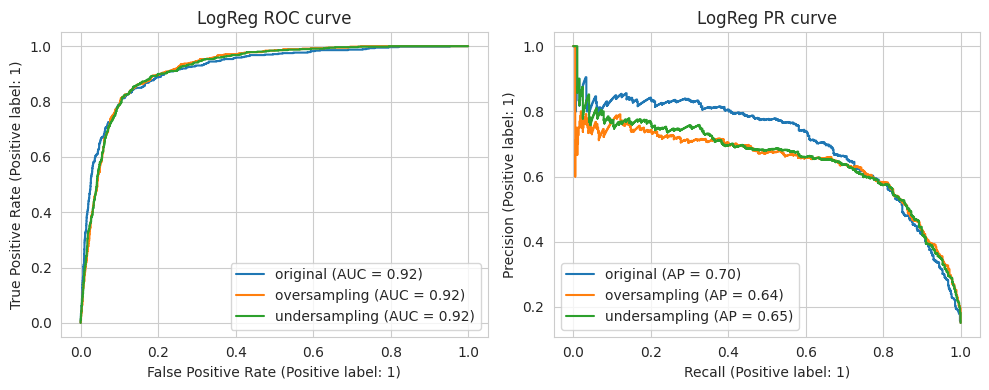

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay
oversample_pipe.fit(X_train_lr, y_train_lr)
undersample_pipe.fit(X_train_lr, y_train_lr)
lr = LogisticRegression().fit(X_train_lr, y_train_lr)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
RocCurveDisplay.from_estimator(lr, X_test_lr, y_test_lr, name="original", ax=axes[0])
RocCurveDisplay.from_estimator(oversample_pipe, X_test_lr, y_test_lr, name="oversampling", ax=axes[0])
RocCurveDisplay.from_estimator(undersample_pipe, X_test_lr, y_test_lr, name="undersampling", ax=axes[0])

axes[0].set_title("LogReg ROC curve")

PrecisionRecallDisplay.from_estimator(lr, X_test_lr, y_test_lr, name="original", ax=axes[1])
PrecisionRecallDisplay.from_estimator(oversample_pipe, X_test_lr, y_test_lr, name="oversampling", ax=axes[1])
PrecisionRecallDisplay.from_estimator(undersample_pipe, X_test_lr, y_test_lr, name="undersampling", ax=axes[1])

axes[1].set_title("LogReg PR curve")
plt.tight_layout()

Model after Random Undersampling and Oversampling with Logistic Regression

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_lr=DecisionTreeClassifier(criterion='entropy',random_state=0)

from sklearn.linear_model import LogisticRegression
LR_lr=LogisticRegression()

from sklearn.naive_bayes import GaussianNB
nb_lr=GaussianNB()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc_lr=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn_lr=KNeighborsClassifier(n_neighbors=6)

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
ada_lr=AdaBoostClassifier(random_state=0)
gb_lr=GradientBoostingClassifier(random_state=0)
bc_lr=BaggingClassifier(random_state=0)

from xgboost import XGBClassifier
xgb_lr=XGBClassifier(random_state=0)

from sklearn import svm
svc_lr=svm.SVC(random_state=0,probability=True)

 Random Undersampling and Oversampling with Logistic Regression - Hyperparameter Tuning of Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

lr_rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,1200),
        'max_features':sp_randint(1,18),
        'max_depth': sp_randint(1,60),
        'min_samples_split':sp_randint(2,40),
        'min_samples_leaf':sp_randint(2,20),
        'criterion':['gini','entropy']}

rsearch_rfc_lr=RandomizedSearchCV(lr_rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc_lr.fit(X_train_lr,y_train_lr)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe015f2d400>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe01b7833a0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe015f2d4f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe01b783a30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe01b438160>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_rfc_lr.best_params_

{'criterion': 'entropy',
 'max_depth': 22,
 'max_features': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 26,
 'n_estimators': 601}

In [ ]:
lr_rfc_tunned=RandomForestClassifier(**rsearch_rfc_lr.best_params_,random_state=0)

 Random Undersampling and Oversampling with Logistic Regression - Hyperparameter Tuning of XGBoost

In [ ]:
XGB_tunned_lr=XGBClassifier(random_state=0)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

rsearch_xgb_lr=RandomizedSearchCV(XGB_tunned_lr,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_xgb_lr.fit(X_train_lr,y_train_lr)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=0, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0)

In [ ]:
rsearch_xgb_lr.best_params_

{'subsample': 0.6,
 'min_child_weight': 10,
 'max_depth': 3,
 'gamma': 5,
 'colsample_bytree': 0.8}

In [ ]:
XGB_tunned_lr=XGBClassifier(**rsearch_xgb_lr.best_params_,random_state=0)

 Random Undersampling and Oversampling with Logistic Regression - Hyperparameter Tuning of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

lr_knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,150),'p':sp_randint(1,70)}

rsearch_knn_lr=RandomizedSearchCV(lr_knn_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn_lr.fit(X_train_lr,y_train_lr)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe01b89c1c0>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe01b8d9be0>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_knn_lr.best_params_

{'n_neighbors': 26, 'p': 10}

In [ ]:
lr_knn_tunned=KNeighborsClassifier(**rsearch_knn_lr.best_params_)

 Random Undersampling and Oversampling with Logistic Regression - Hyperparameter Tuning of SVC

In [ ]:
from sklearn import svm
SVM_tunned_lr=svm.SVC(random_state=0,probability=True)
params = {'C': [0.1, 1, 10, 100, 1000],
          'degree': [0, 1, 2, 3, 4, 5, 6],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf']}

rsearch_svm_lr=RandomizedSearchCV(SVM_tunned_lr,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_svm_lr.fit(X_train_lr,y_train_lr)

RandomizedSearchCV(cv=3, estimator=SVC(probability=True, random_state=0),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [0, 1, 2, 3, 4, 5, 6],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=0)

In [ ]:
rsearch_svm_lr.best_params_

{'kernel': 'rbf', 'gamma': 0.0001, 'degree': 0, 'C': 1000}

In [ ]:
SVM_tunned_lg=svm.SVC(**rsearch_svm_lr.best_params_,random_state=0,probability=True)

In [ ]:
from sklearn.ensemble import VotingClassifier

soft_voting_lr=VotingClassifier(estimators=[('Bagging',bc_lr),('Random Forest Tunned',rfc_lr),('XGB Tuned',XGB_tunned_lr)],voting='soft')

weighted_soft_lr=VotingClassifier(estimators=[('Bagging',bc_lr),('Random Forest Tunned',rfc_lr),('XGB Tunned',XGB_tunned_lr)],weights=[3,1,2],voting='soft')

In [ ]:
models_lr=[]
models_lr.append(('Logistic',LR_lr))
models_lr.append(('Decision Tree',dt_lr))
models_lr.append(('Naive Bayes',nb_lr))
models_lr.append(('Random Forest',rfc_lr))
models_lr.append(('Random Forest Tuned',lr_rfc_tunned))
models_lr.append(('KNN',knn_lr))
models_lr.append(('KNN Tuned',lr_knn_tunned))
models_lr.append(('Bagging',bc_lr))
models_lr.append(('Ada-Boost',ada_lr))
models_lr.append(('Gradient Boost',gb_lr))
models_lr.append(('Soft Voting',soft_voting_lr))
models_lr.append(('Weighted Soft Voting',weighted_soft_lr))
models_lr.append(('XGB',xgb_lr))
models_lr.append(('XGB Tuned',XGB_tunned_lr))
models_lr.append(('SVM',svc_lr))
models_lr.append(('SVM Tuned',SVM_tunned_lr))

In [ ]:
X_train_lr=np.array(X_train_lr)
y_train_lr=np.array(y_train_lr)
X_test=np.array(X_test_lr)
y_test=np.array(y_test_lr)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
acc_train_lr=[]
auc_train_lr=[]

acc_test_lr=[]
auc_test_lr=[]
names_lr=[]
def model_eval(name,algo, Xtrain,ytrain,Xtest,ytest):
    names_lr.append(name)

    algo.fit(Xtrain,ytrain)
    ytrain_pred =algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    acc_train_lr.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_lr.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    acc_test_lr.append(accuracy_score(ytest, ytest_pred))
    auc_test_lr.append(roc_auc_score(ytest, ytest_prob))

In [ ]:
for name,algo in models_lr:
    model_eval(name,algo,X_train_lr,y_train_lr,X_test_lr,y_test_lr)

In [ ]:
result_lr_df=pd.DataFrame({'Model':names_lr,

                           'Accuracy Score Train':acc_train_lr,
                           'ROC-AUC Score Train':auc_train_lr,

                           'Accuracy Score Test':acc_test_lr,
                           'ROC-AUC Score Test':auc_test_lr
                            })

 Random Undersampling and Oversampling with Logistic Regression Model Results

In [ ]:
result_lr_df

Model  Accuracy Score Train  ROC-AUC Score Train  \
0               Logistic              0.898158             0.911946   
1          Decision Tree              0.995366             0.999887   
2            Naive Bayes              0.829452             0.848538   
3          Random Forest              0.995366             0.999575   
4    Random Forest Tuned              0.919592             0.958798   
5                    KNN              0.866643             0.906835   
6              KNN Tuned              0.844282             0.836130   
7                Bagging              0.987255             0.998455   
8              Ada-Boost              0.893060             0.922635   
9         Gradient Boost              0.912409             0.942963   
10           Soft Voting              0.979261             0.997308   
11  Weighted Soft Voting              0.977755             0.996742   
12                   XGB              0.969065             0.988920   
13             XGB Tuned              0.907658             0.936747   
14                   SVM              0.843703             0.872020   
15             SVM Tuned              0.843703             0.872020   

    Accuracy Score Test  ROC-AUC Score Test  
0              0.905380            0.920452  
1              0.857799            0.735631  
2              0.829413            0.863001  
3              0.902947            0.922996  
4              0.912138            0.936906  
5              0.848067            0.743858  
6              0.850500            0.787735  
7              0.889700            0.893809  
8              0.898892            0.915260  
9              0.908624            0.937279  
10             0.906732            0.931154  
11             0.905650            0.928857  
12             0.898892            0.920957  
13             0.912949            0.935852  
14             0.849419            0.861488  
15             0.849419            0.861488

Managing class imbalance via a random over and under sampling technique.  The top three performance models are Random Forest Tuned, Gradient Boost, and XGB Tuned.

#3) SMOTE

In [ ]:
X=df_final[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'PageValues', 'TrafficType_1',
            'TrafficType_3', 'TrafficType_13', 'TrafficType_6', 'TrafficType_8', 'Browser_6', 'Month_May', 'Month_Nov',
            'Month_Oct', 'Month_Sep', 'Month_Aug', 'Month_Jul', 'VisitorType_New_Visitor']]
X.head()

Administrative  Informational  ProductRelated  BounceRates  PageValues  \
0               0              0               1     0.724780         0.0   
1               0              0               2     0.000000         0.0   
2               0              0               1     0.724780         0.0   
3               0              0               2     0.549280         0.0   
4               0              0              10     0.457305         0.0   

   TrafficType_1  TrafficType_3  TrafficType_13  TrafficType_6  TrafficType_8  \
0              1              0               0              0              0   
1              0              0               0              0              0   
2              0              1               0              0              0   
3              0              0               0              0              0   
4              0              0               0              0              0   

   Browser_6  Month_May  Month_Nov  Month_Oct  Month_Sep  Month_Aug  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Month_Jul  VisitorType_New_Visitor  
0          0                        0  
1          0                        0  
2          0                        0  
3          0                        0  
4          0                        0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
print(X_train.shape,X_test.shape)

(8631, 18) (3699, 18)


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=3)

X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)

In [ ]:
pd.Series(y_train).value_counts() #Target before smote

0    7281
1    1350
Name: Revenue, dtype: int64

In [ ]:
pd.Series(y_train_sm).value_counts() #target After Smote

0    7281
1    7281
Name: Revenue, dtype: int64

Model After SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_sm=DecisionTreeClassifier(criterion='entropy',random_state=0)

from sklearn.linear_model import LogisticRegression
LR_sm=LogisticRegression()

from sklearn.naive_bayes import GaussianNB
nb_sm=GaussianNB()

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
rfc_sm=RandomForestClassifier(n_estimators=100,random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn_sm=KNeighborsClassifier(n_neighbors=6)

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
ada_sm=AdaBoostClassifier(random_state=0)
gb_sm=GradientBoostingClassifier(random_state=0)
bc_sm=BaggingClassifier(random_state=0)

from xgboost import XGBClassifier
xgb_sm=XGBClassifier(random_state=0)

from sklearn import svm
svc_sm=svm.SVC(random_state=0,probability=True)

Hyperparameter Tuning of Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

sm_rfc_tunned=RandomForestClassifier(n_estimators=100,random_state=0)
params={'n_estimators':sp_randint(1,1200),
        'max_features':sp_randint(1,18),
        'max_depth': sp_randint(1,60),
        'min_samples_split':sp_randint(2,40),
        'min_samples_leaf':sp_randint(2,20),
        'criterion':['gini','entropy']}

rsearch_rfc_sm=RandomizedSearchCV(sm_rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc_sm.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe333931df0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe3549ce7f0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe333931220>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe33432ffa0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe333936760>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_rfc_sm.best_params_

{'criterion': 'entropy',
 'max_depth': 29,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1078}

In [ ]:
sm_rfc_tunned=RandomForestClassifier(**rsearch_rfc_sm.best_params_,random_state=0)

Hyperparameter Tuning of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

sm_knn_tunned=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,150),'p':sp_randint(1,70)}

rsearch_knn_sm=RandomizedSearchCV(sm_knn_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)
rsearch_knn_sm.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe33391ed30>,
                                        'p': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe333936fd0>},
                   random_state=0, scoring='roc_auc')

In [ ]:
rsearch_knn_sm.best_params_

{'n_neighbors': 26, 'p': 10}

In [ ]:
sm_knn_tunned=KNeighborsClassifier(**rsearch_knn_sm.best_params_)

Hyperparameter Tuning of XGB

In [ ]:
XGB_tunned_sm=XGBClassifier(random_state=0)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

rsearch_xgb_sm=RandomizedSearchCV(XGB_tunned_sm,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_xgb_sm.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=0, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0)

In [ ]:
rsearch_xgb_sm.best_params_

{'subsample': 0.6,
 'min_child_weight': 10,
 'max_depth': 5,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [ ]:
XGB_tunned_sm=XGBClassifier(**rsearch_xgb_sm.best_params_,random_state=0)

Hyperparameter Tuning of SVC

In [ ]:
from sklearn import svm
SVM_tunned_sm=svm.SVC(random_state=0,probability=True)
params = {'C': [0.1, 1, 10, 100, 1000],
          'degree': [0, 1, 2, 3, 4, 5, 6],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf']}

rsearch_svm_sm=RandomizedSearchCV(SVM_tunned_sm,param_distributions=params,cv=3,n_iter=200,n_jobs=-1,random_state=0)

rsearch_svm_sm.fit(X_train_sm,y_train_sm)

RandomizedSearchCV(cv=3, estimator=SVC(probability=True, random_state=0),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [0, 1, 2, 3, 4, 5, 6],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   random_state=0)

In [ ]:
rsearch_svm_sm.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'degree': 0, 'C': 10}

In [ ]:
SVM_tunned_sm=svm.SVC(**rsearch_svm_sm.best_params_,random_state=0,probability=True)

In [ ]:
from sklearn.ensemble import VotingClassifier

soft_voting_sm=VotingClassifier(estimators=[('Bagging',bc_sm),('Random Forest Tunned',rfc_sm)],voting='soft')

weighted_soft_sm=VotingClassifier(estimators=[('Bagging',bc_sm),('Random Forest Tunned',rfc_sm)],weights=[3,1,2],voting='soft')

In [ ]:
models_sm=[]
models_sm.append(('Logistic',LR_sm))
models_sm.append(('Decision Tree',dt_sm))
models_sm.append(('Naive Bayes',nb_sm))
models_sm.append(('Random Forest',rfc_sm))
models_sm.append(('Random Forest Tuned',sm_rfc_tunned))
models_sm.append(('KNN',knn_sm))
models_sm.append(('KNN Tuned',sm_knn_tunned))
models_sm.append(('Bagging',bc_sm))
models_sm.append(('Ada-Boost',ada_sm))
models_sm.append(('Gradient Boost',gb_sm))
models_sm.append(('Soft Voting',soft_voting_sm))
models_sm.append(('Weighted Soft Voting',weighted_soft_sm))
models_sm.append(('XGB',xgb_sm))
models_sm.append(('XGB Tuned',XGB_tunned_sm))
models_sm.append(('SVM',svc_sm))
models_sm.append(('SVM Tuned',SVM_tunned_sm))

In [ ]:
X_train_sm=np.array(X_train_sm)
y_train_sm=np.array(y_train_sm)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
acc_train_sm=[]
auc_train_sm=[]

acc_test_sm=[]
auc_test_sm=[]
names_sm=[]
def model_eval(name,algo, Xtrain,ytrain,Xtest,ytest):
    names_sm.append(name)

    algo.fit(Xtrain,ytrain)
    ytrain_pred =algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    acc_train_sm.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_sm.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    acc_test_sm.append(accuracy_score(ytest, ytest_pred))
    auc_test_sm.append(roc_auc_score(ytest, ytest_prob))

In [ ]:
for name,algo in models_sm:
    model_eval(name,algo,X_train_sm,y_train_sm,X_test,y_test)

In [ ]:
result_sm_df=pd.DataFrame({'Model':names_sm,

                           'Accuracy Score Train':acc_train_sm,
                           'ROC-AUC Score Train':auc_train_sm,

                           'Accuracy Score Test':acc_test_sm,
                           'ROC-AUC Score Test':auc_test_sm
                            })

SMOTE Model Results

In [ ]:
result_sm_df

Model  Accuracy Score Train  ROC-AUC Score Train  \
0               Logistic              0.878107             0.939496   
1          Decision Tree              0.994850             0.999936   
2            Naive Bayes              0.743442             0.879684   
3          Random Forest              0.994850             0.999779   
4    Random Forest Tuned              0.958179             0.995381   
5                    KNN              0.890812             0.969696   
6              KNN Tuned              0.798997             0.908782   
7                Bagging              0.990523             0.999449   
8              Ada-Boost              0.908460             0.960658   
9         Gradient Boost              0.917250             0.972493   
10           Soft Voting              0.984274             0.999188   
11  Weighted Soft Voting              0.991279             0.999560   
12                   XGB              0.964291             0.994753   
13             XGB Tuned              0.936204             0.983681   
14                   SVM              0.780456             0.851126   
15             SVM Tuned              0.952822             0.987214   

    Accuracy Score Test  ROC-AUC Score Test  
0              0.884834            0.895041  
1              0.858881            0.778455  
2              0.599892            0.707420  
3              0.879968            0.913427  
4              0.887808            0.924108  
5              0.734793            0.760106  
6              0.657205            0.776729  
7              0.864017            0.890054  
8              0.889159            0.893690  
9              0.891322            0.921068  
10             0.881319            0.920065  
11             0.876723            0.916408  
12             0.885915            0.911277  
13             0.887808            0.912707  
14             0.727494            0.845899  
15             0.852122            0.857024


Managing class imbalance via SMOTE technique.  The top three performance models are Random Forest Tuned, Gradient Boost, and XGB Tuned.

In [ ]:
def model_graph(name,algo, Xtrain,ytrain,Xtest,ytest):

    algo.fit(Xtrain,ytrain)
    ytrain_pred =algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    acc_train_sm.append(accuracy_score(ytrain, ytrain_pred))
    auc_train_sm.append(roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    acc_test_sm.append(accuracy_score(ytest, ytest_pred))
    auc_test_sm.append(roc_auc_score(ytest, ytest_prob))


    fpr,tpr,th=roc_curve(ytest, ytest_prob)

    plt.plot(fpr,tpr,label=name)
    plt.plot(fpr,fpr)
    plt.legend(loc="lower right")

plt.show()

#Comparison of Top 3 best performing Models-SMOTE method

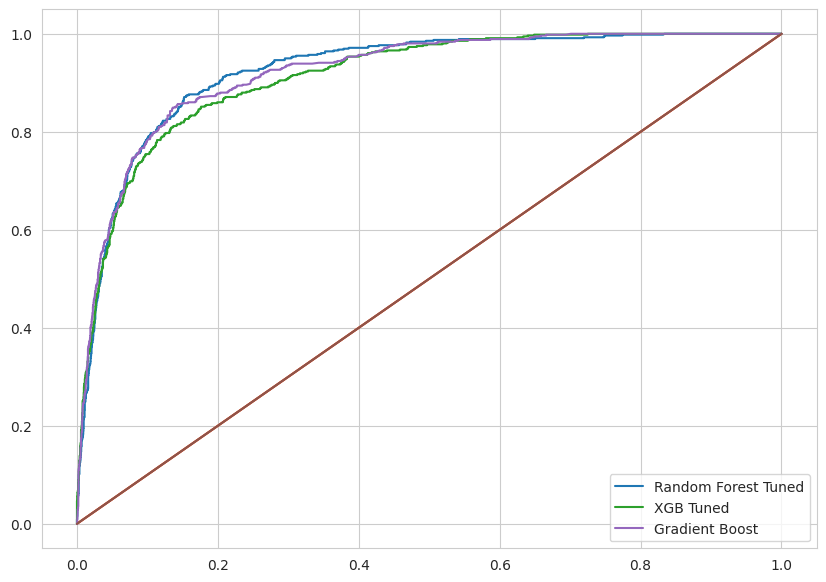

In [ ]:
#smote
plt.figure(figsize=(10,7))
model_sm_final=[('Random Forest Tuned',sm_rfc_tunned),('XGB Tuned',XGB_tunned_sm),('Gradient Boost',gb_sm)]

for name,algo in model_sm_final:
    model_graph(name,algo,X_train_sm,y_train_sm,X_test,y_test)